In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% ! important;}
div.cell.code_cell.rendered{width:100%}
div.input_prompt{padding:0px}
div.CodeMirror {font-family:Consolas ; font-size:12pt;}
div.text_cell_render.rendered_html {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold}
div.input {font-family:Consolas ; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch.12 데이터 시각화</font></b>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 저장시 해상도 높게
%config InlineBackend.figure_format='retina'
# 한글기본설정(windows mac)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 꺠짐 방지
# warnig을 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

# 2절 seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
    - https://seaborn.pydata.org/ (공식사이트)
    - https://seaborn.pydata.org/api.html (seaborn 그래프 API)
- seaborn으로 그래프 그리기 위한 단계
    1) 데이터 준비<br>
    2) 미적속성 설정<br>
    3) 함수를 이용해서 그래프 그리기(관계형=수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프)<br>
    4) 그래프 출력(show), 저장(savefig)

## 2.1 데이터 준비하기
- iris, titanic

In [5]:
iris= sns.load_dataset('iris')
iris.shape

(150, 5)

In [6]:
titanic=sns.load_dataset('titanic')
titanic.head()
# pclass, class: 티켓class
# sibsp : 동승한 현제나 배우자 / parch : 동승한 부모/자식수 / embarked, embark_town :탑승지
# deck :데크

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2.2 미적 속성 설정하기(style, context, palette, figsize,....)
### 1) 그래프 스타일 지정
- white, whitegrid, darkgrid, dark, ticks
### 2) 컨텍스트 지정(배율)
- notebook(기본값 1.0), paper(0.8), talk(1.3), poster(1.8)
### 3) 컬러팔레트
- https://matplotlib.org/stable/users/explain/colors/colormaps.html (colormap) 21page ,54 page
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette 
- https://seaborn.pydata.org/tutorial/color_palettes.html

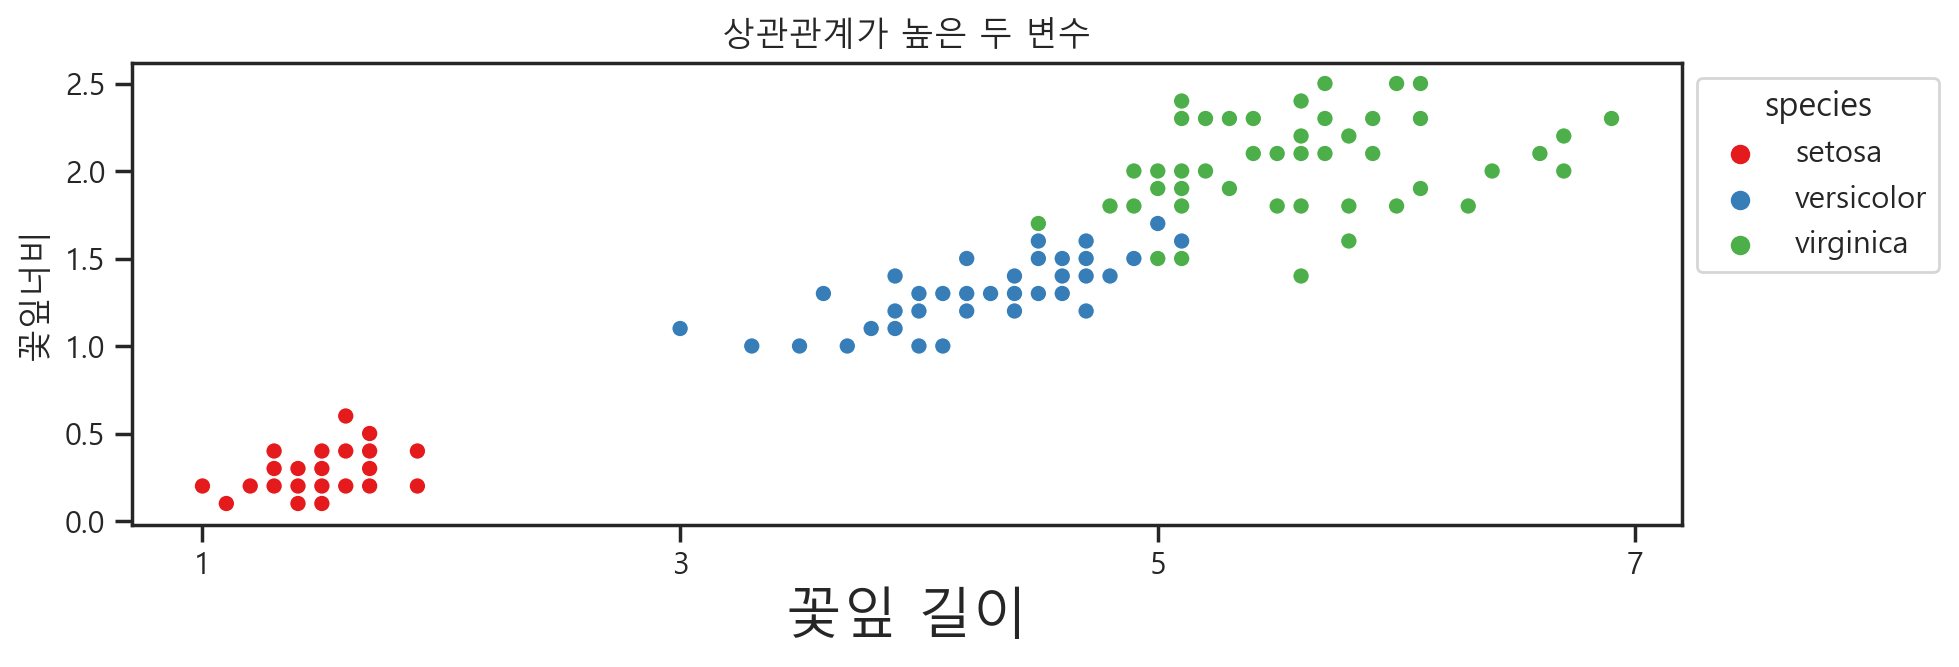

In [21]:
# 기본 미적 속성
sns.set(style='ticks', palette='Set2', rc={'figure.figsize':(10,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

ax=sns.scatterplot(data=iris,x='petal_length',y='petal_width', hue='species',
               palette='Set1')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title='상관관계가 높은 두 변수',
      ylabel='꽃잎너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
ax.set_xticks([1,3,5,7])
plt.show()

In [22]:
# 기본 미적 속성
sns.set(style='ticks', palette='Set2', rc={'figure.figsize':(10,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 2.3 seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
- scatterplot, lineplot, relplot(서브플롯제공) : x가 수치형

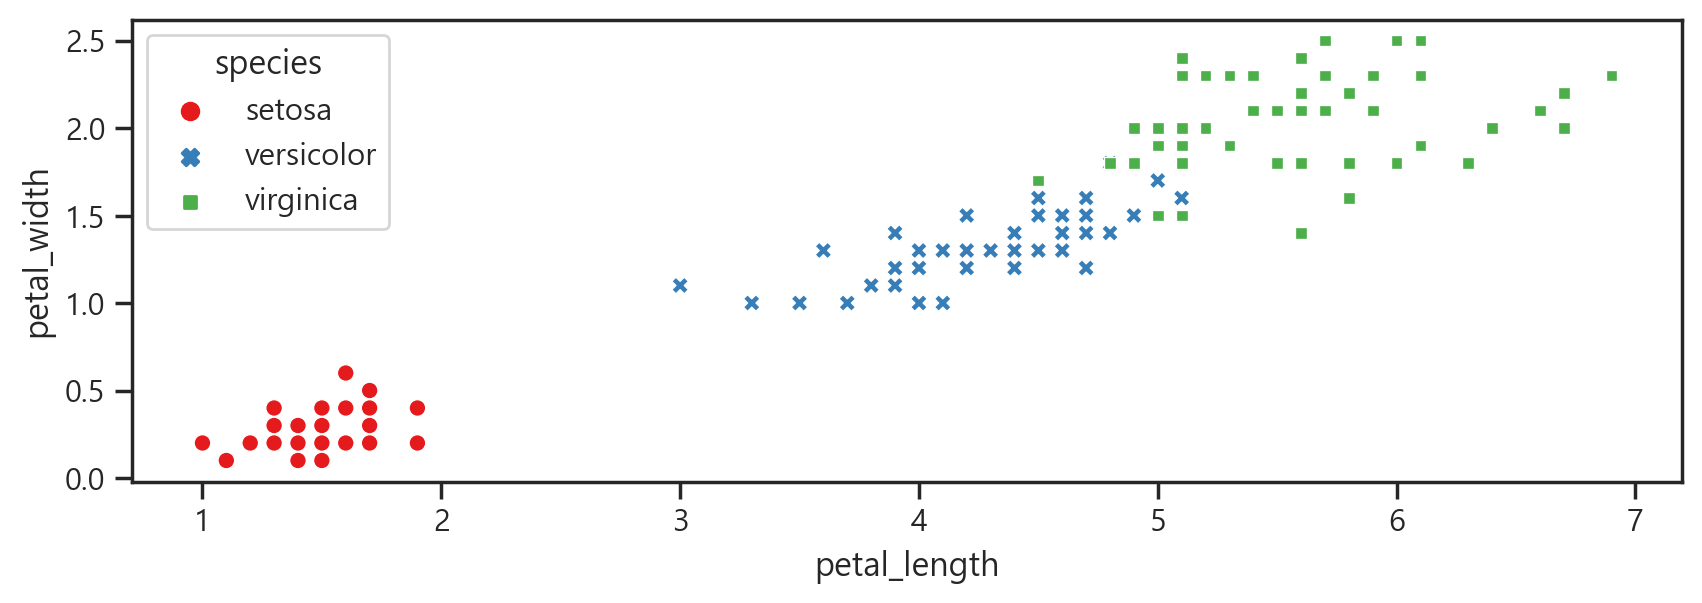

In [34]:
# 종별 다른 색상과 다른 스타일로  scaatterplot
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species', palette='Set1')
plt.show()

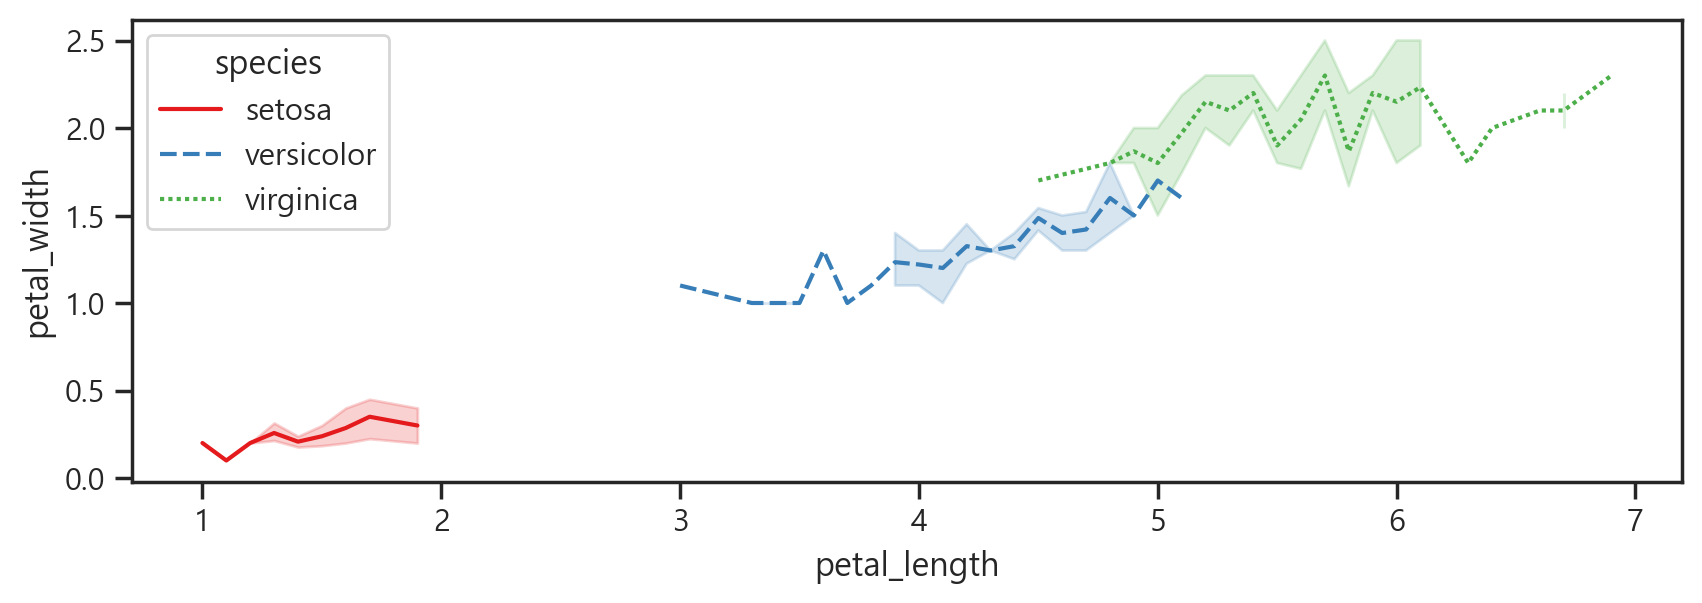

In [33]:
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species', palette='Set1')
plt.show()

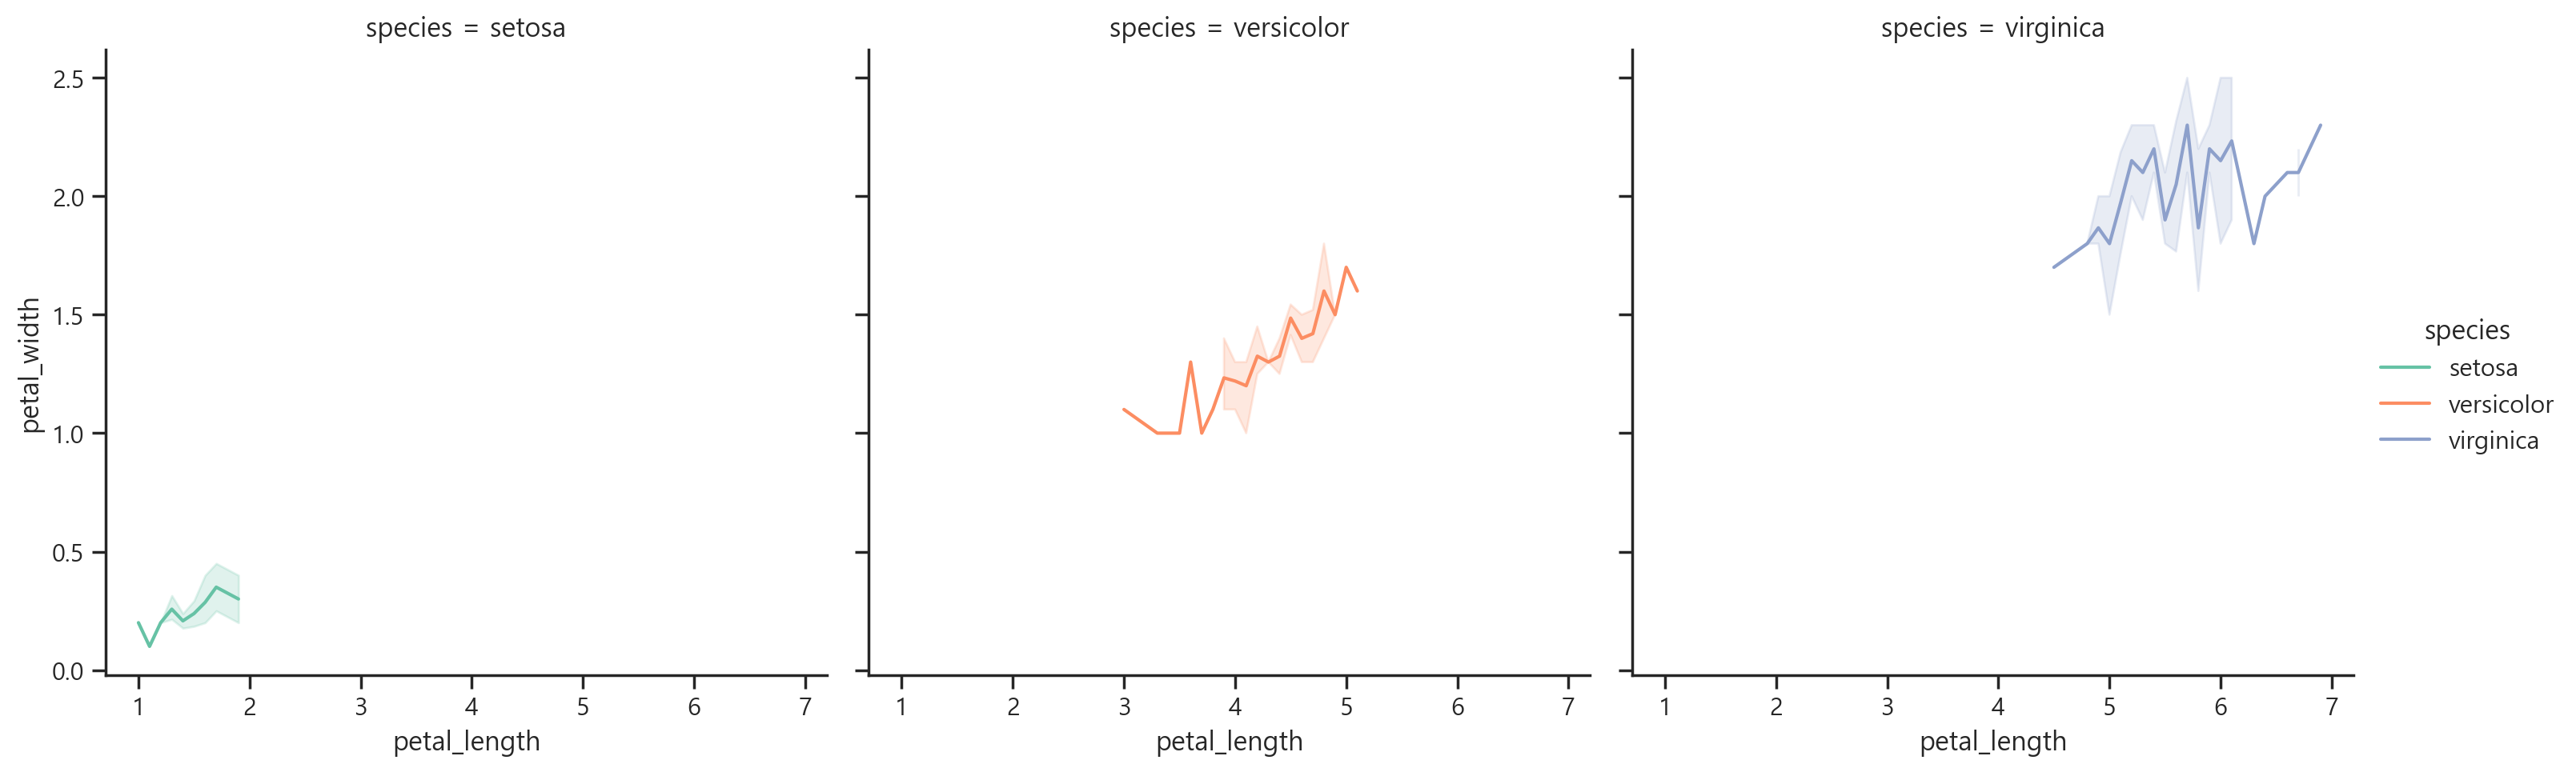

In [38]:
# 종별 lineplot을 서브플롯으로, 서브플롯은 다른 방법으로 크기지정이 필요함
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
            kind='line', # 서브플롯으로 그려질 그래프 종류(기본값 : scatter)
            col='species', # col 단위로 서브플롯 표현
#             col_wrap=2 # 한 줄에 표현될 서븝플롯 수
#             facet_kws={'sharey':False} # 축 공유 해제
           )
plt.show()

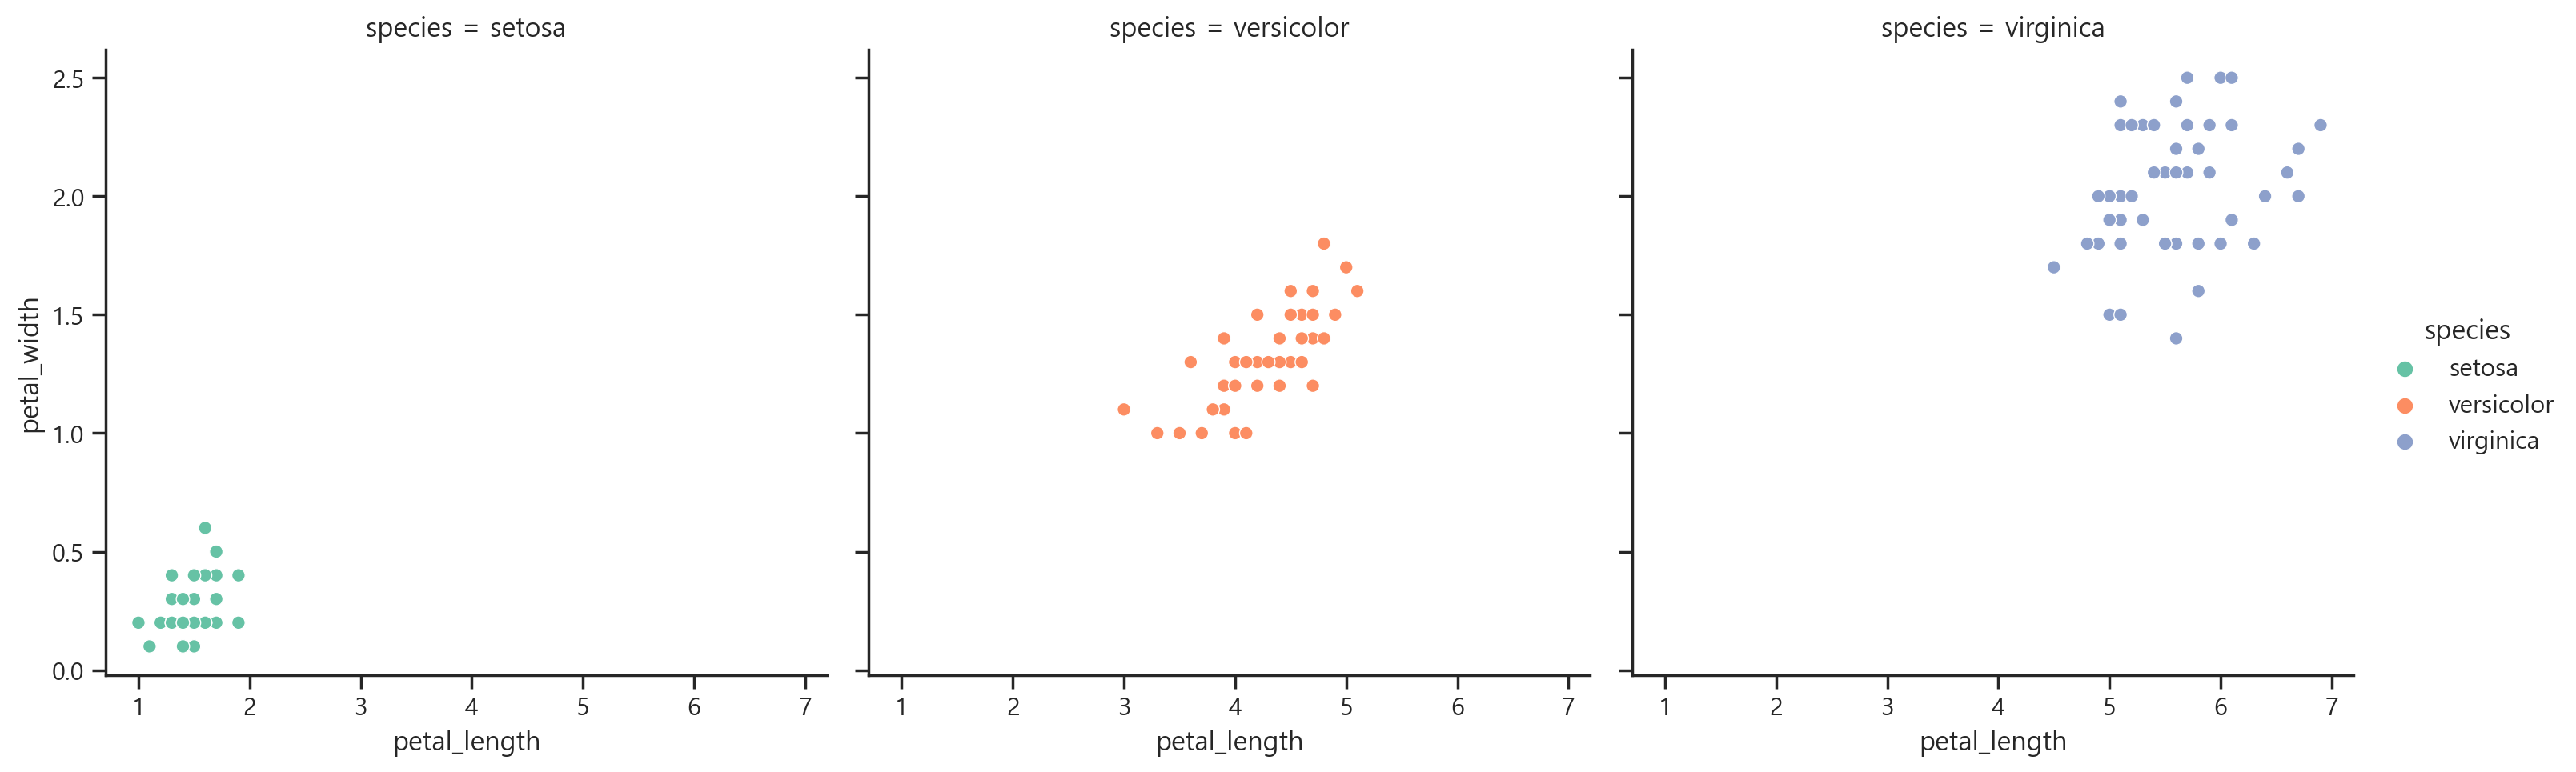

In [39]:
# 종별 scatterplot을 서브플롯으로, 서브플롯은 다른 방법으로 크기지정이 필요함
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
            col='species', # col 단위로 서브플롯 표현
#             col_wrap=2 # 한 줄에 표현될 서븝플롯 수
#             facet_kws={'sharey':False} # 축 공유 해제
           )
# 크기 조정
g.fig.set_size_inches(10,3)
plt.show()

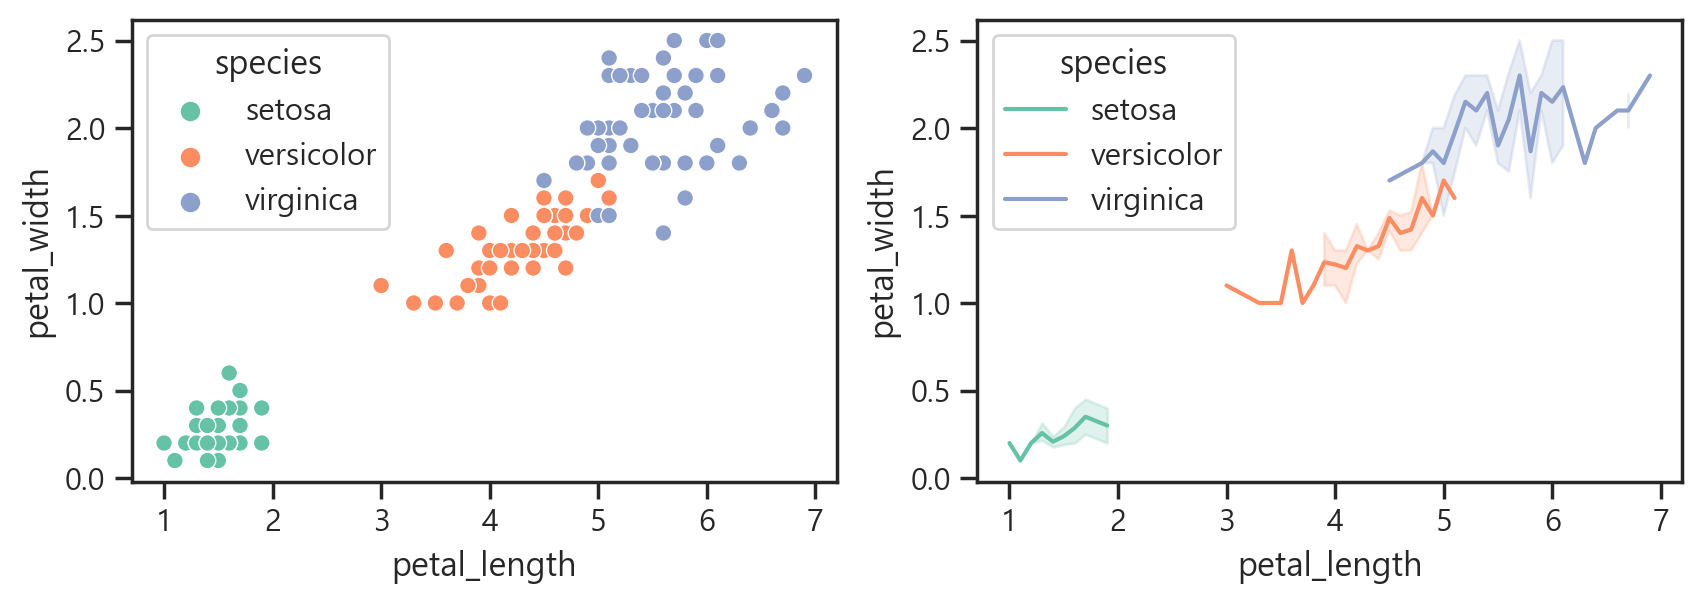

In [44]:
# ax[0]에는 scatter, ax[1]에는 line
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=iris,x='petal_length', y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris,x='petal_length', y='petal_width', hue='species', ax=ax[1])
plt.show()

### 2) 범주형 그래프
- stripplot(무작위로 흩뿌림), swarmplot(겹치지않음) - 점도표
- barplot, pointplot(막대대신 marker가 있는 선)
- countplot(bar는 y의 평균값이 높이, count는 x의 빈도수 높이)
- boxplot, violinplot, boxenplot  => catplot(서브플롯)

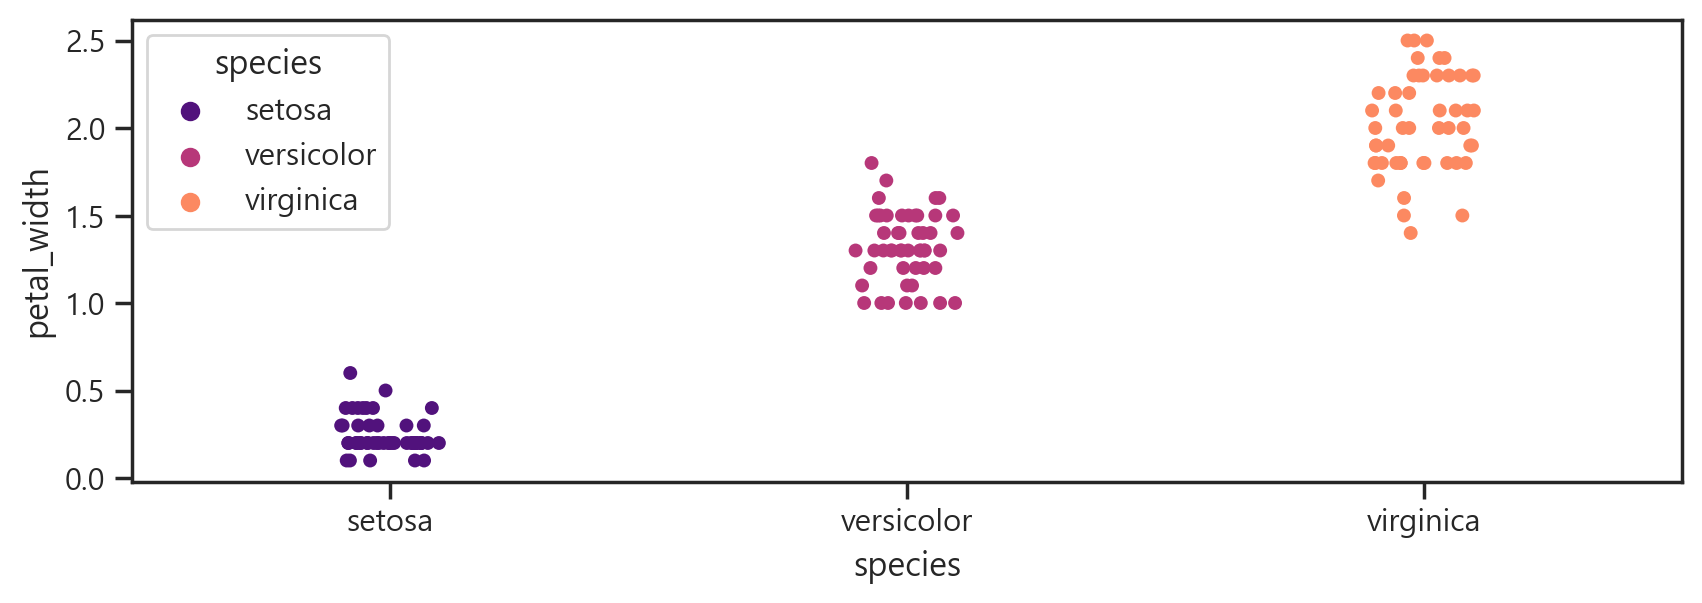

In [53]:
# x축이 범주형일때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species', palette='magma')
plt.show()

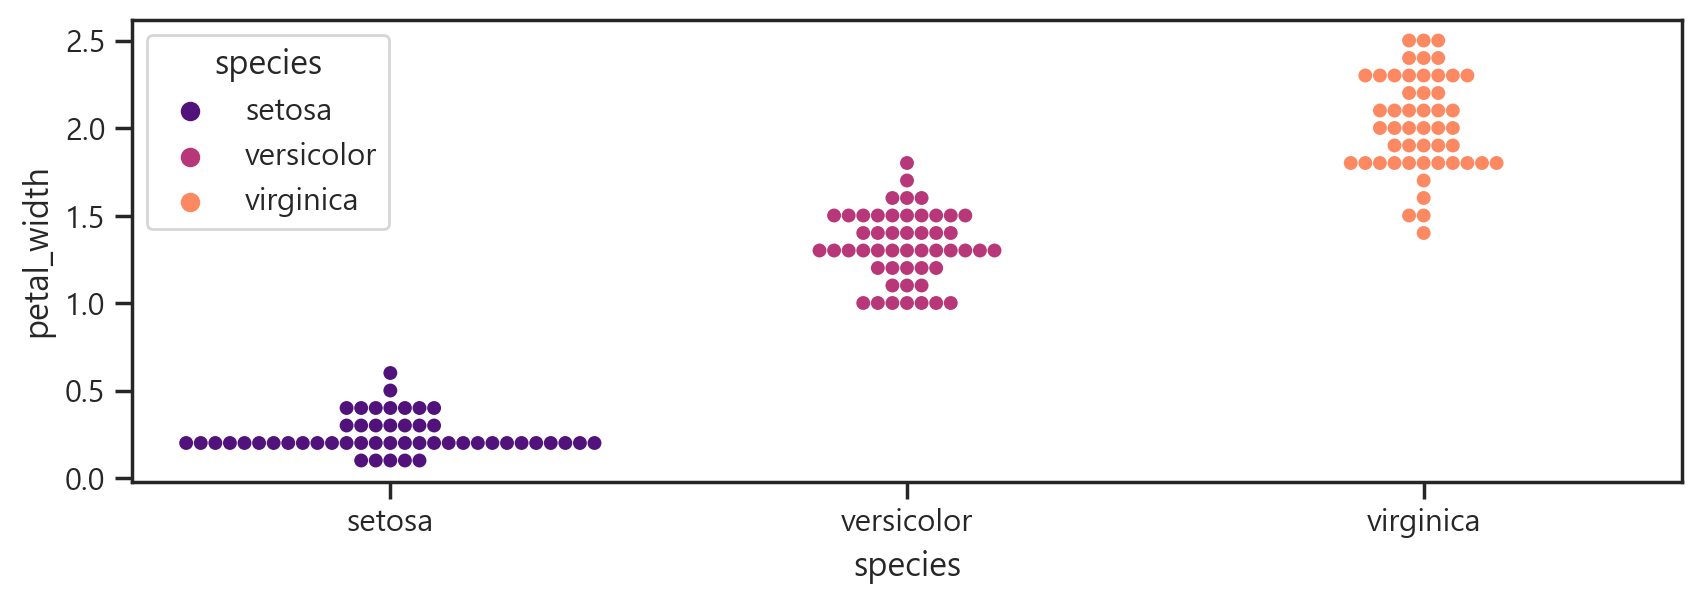

In [54]:
# x축이 범주형일때의 산점도 (중첩되지 않게)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species', palette='magma')
plt.show()

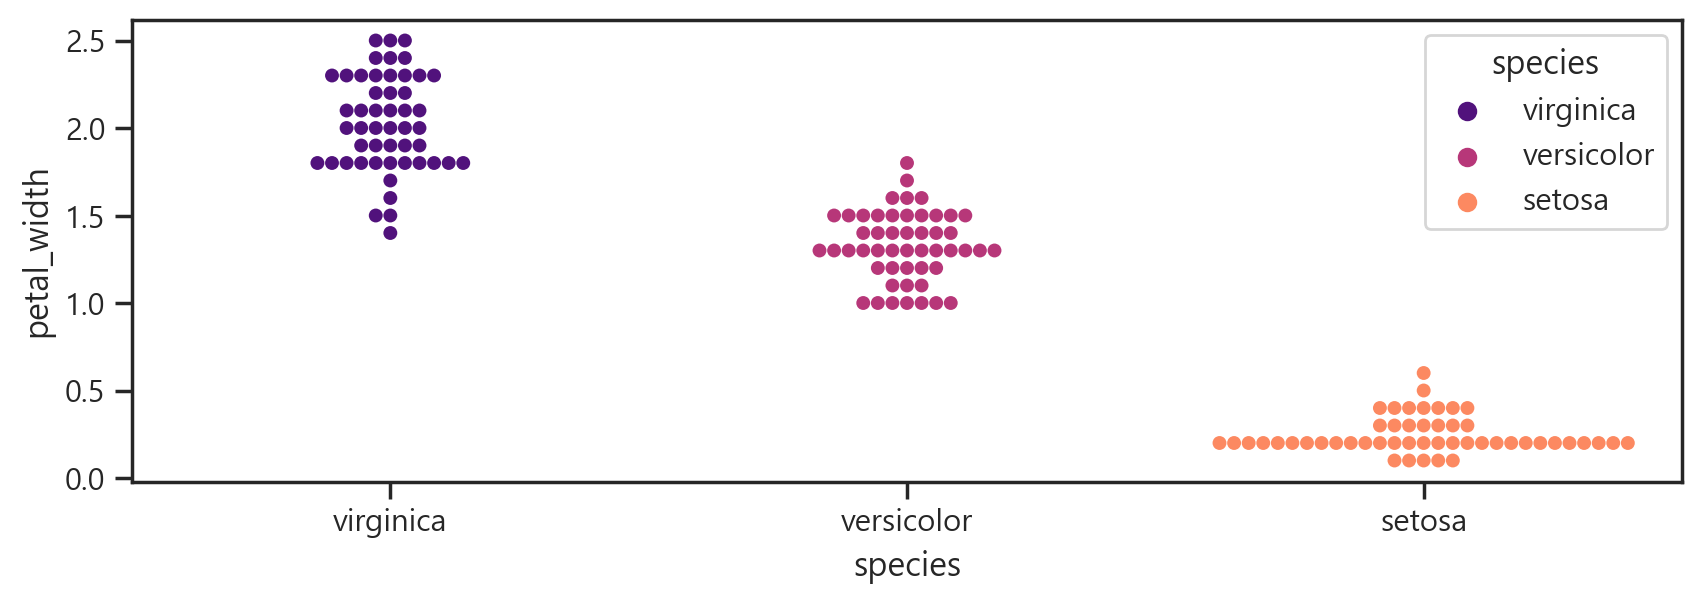

In [59]:
# 내림차순으로 정렬된 iris 범주현 산점도
sns.swarmplot(data=iris.sort_values('petal_width',ascending=False), x='species', y='petal_width', hue='species', palette='magma')
plt.show()

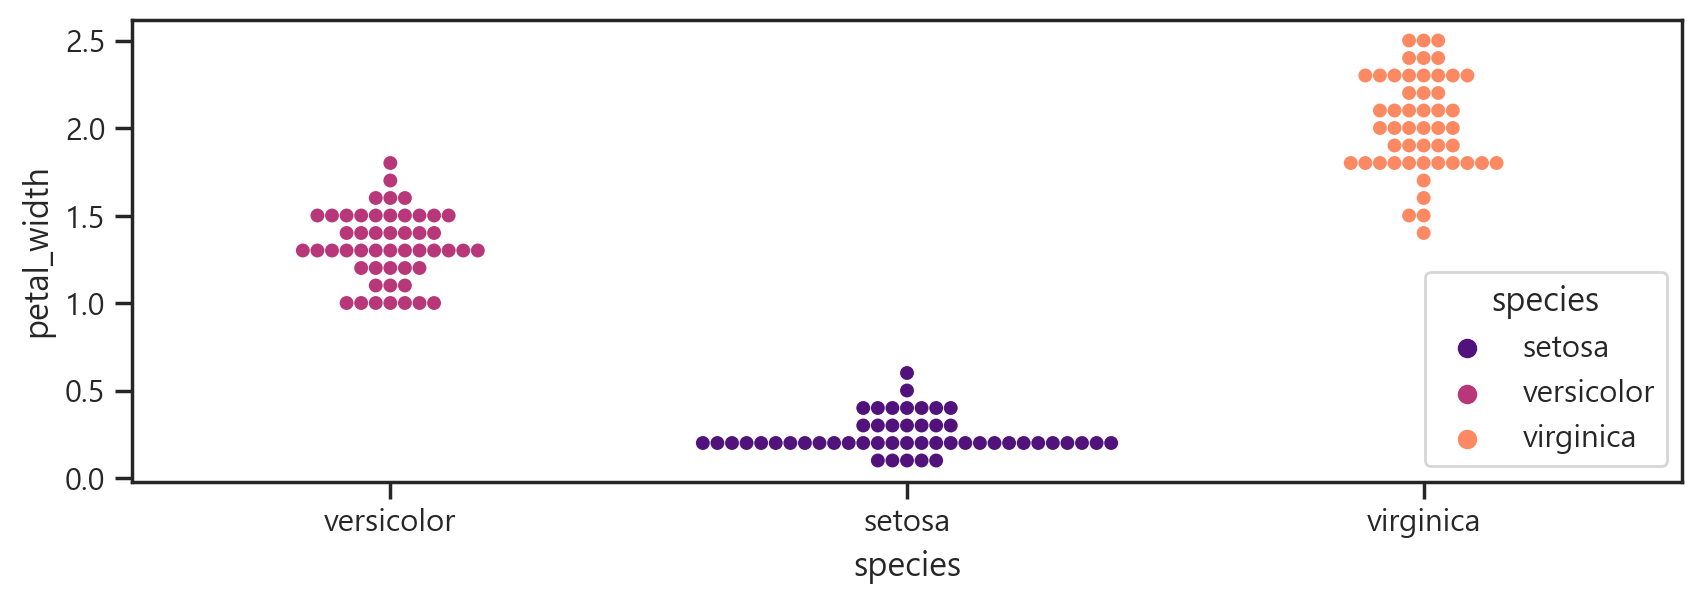

In [60]:
# x축의 순서를 임의로 정할 수 있음
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species', palette='magma',
             order=['versicolor','setosa', 'virginica'])
plt.show()

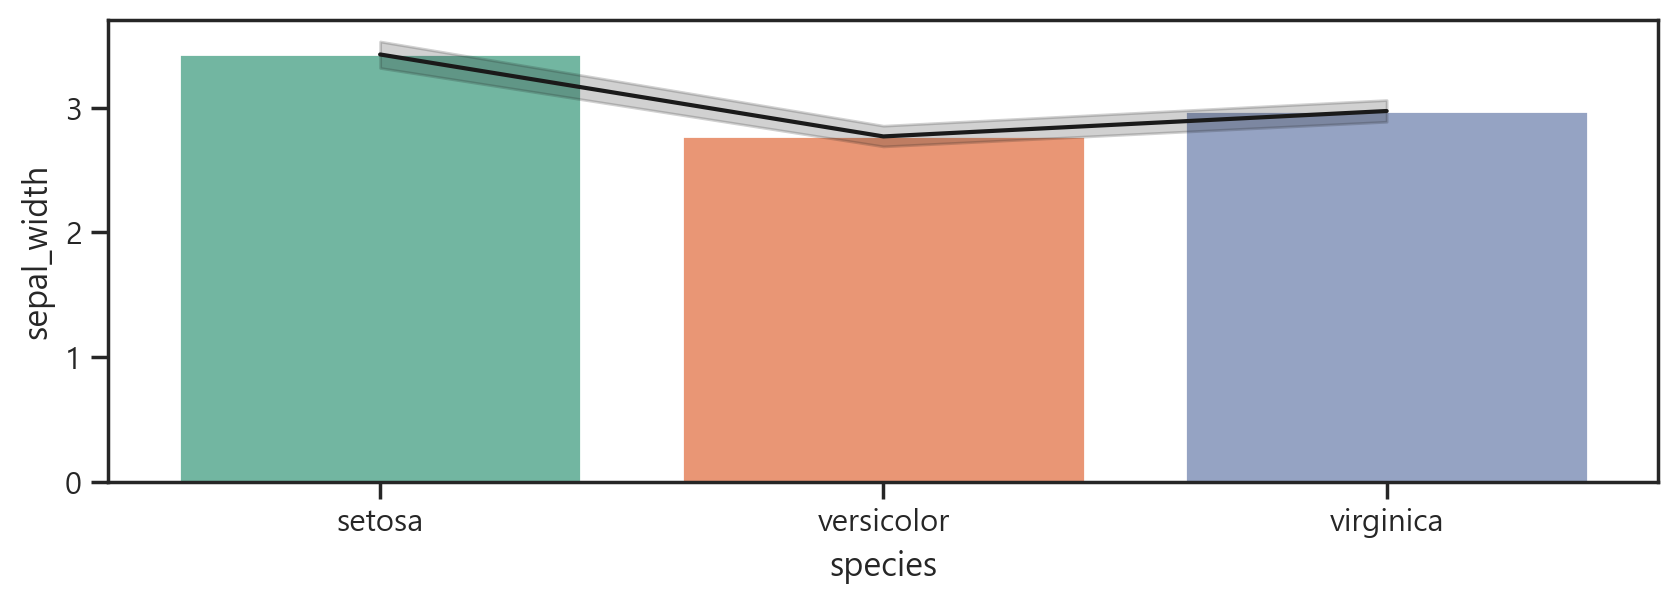

In [63]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰구간(신뢰구간 제외: errorbar=None)
sns.barplot(data=iris,x='species', y='sepal_width',
           errorbar=None)
sns.lineplot(data=iris,x='species',y='sepal_width', color='k')
plt.show()

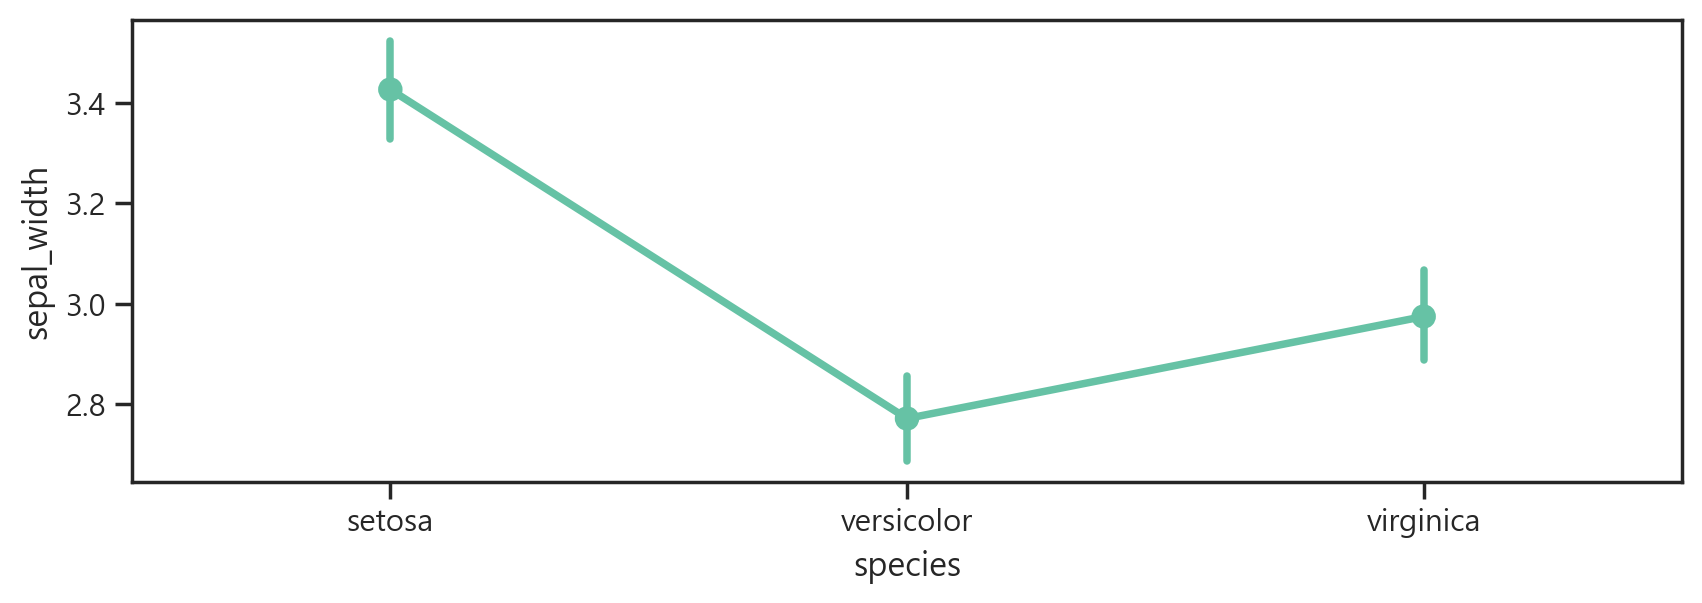

In [65]:
sns.pointplot(data=iris,x='species', y='sepal_width')
plt.show()

In [66]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


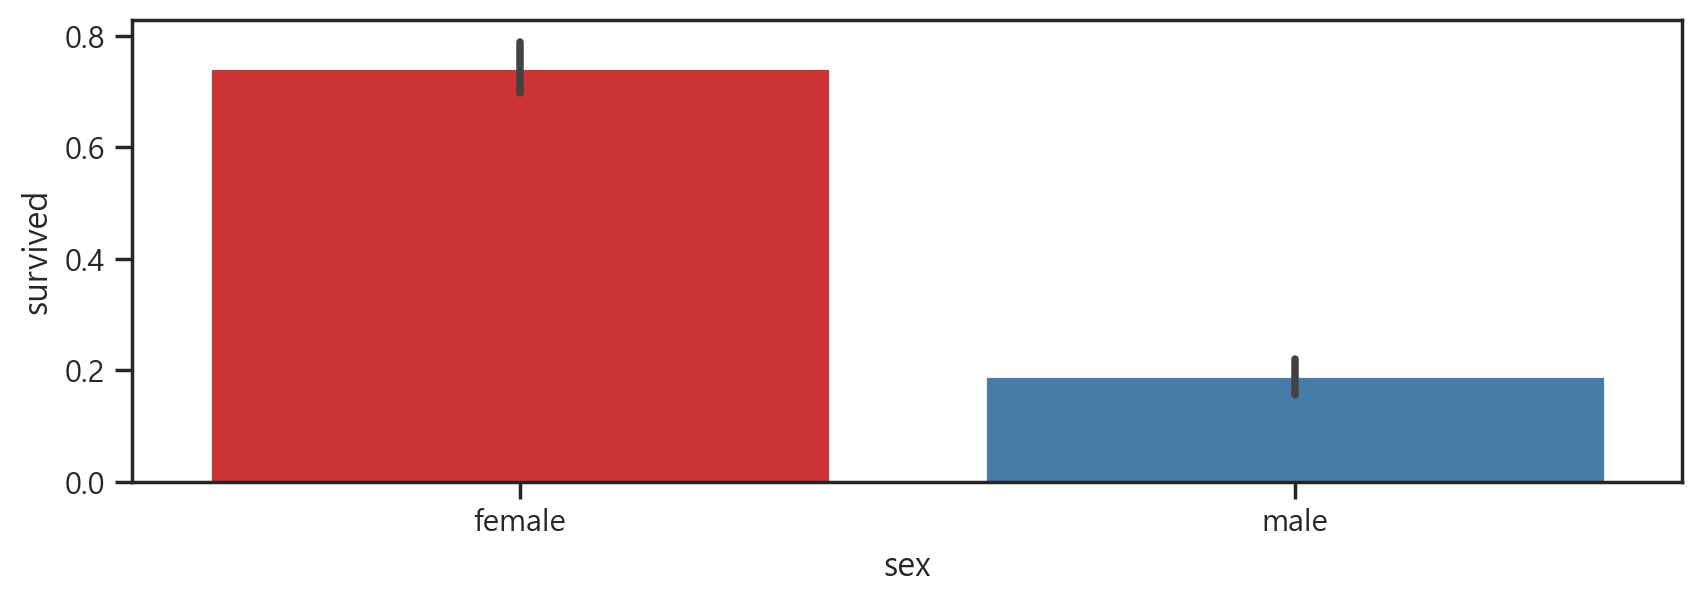

In [70]:
# 성별 평균 생존율을 막대그래프
sns.barplot(data=titanic, x='sex', y='survived',
           order=['female','male'],
           palette='Set1')
plt.show()

In [72]:
# 남여 데이터 수
titanic.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [74]:
# 남여 데이터 수(정렬)
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

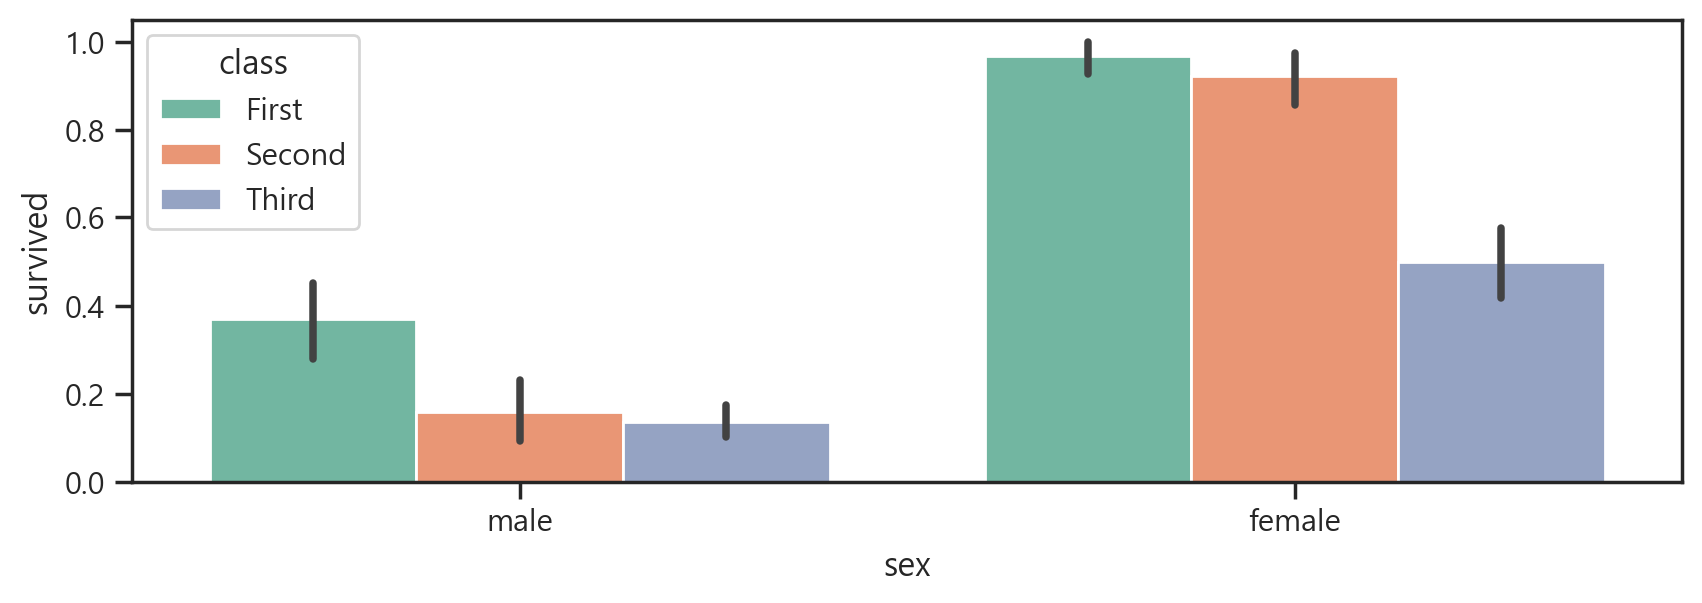

In [76]:
# class별 생존률
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

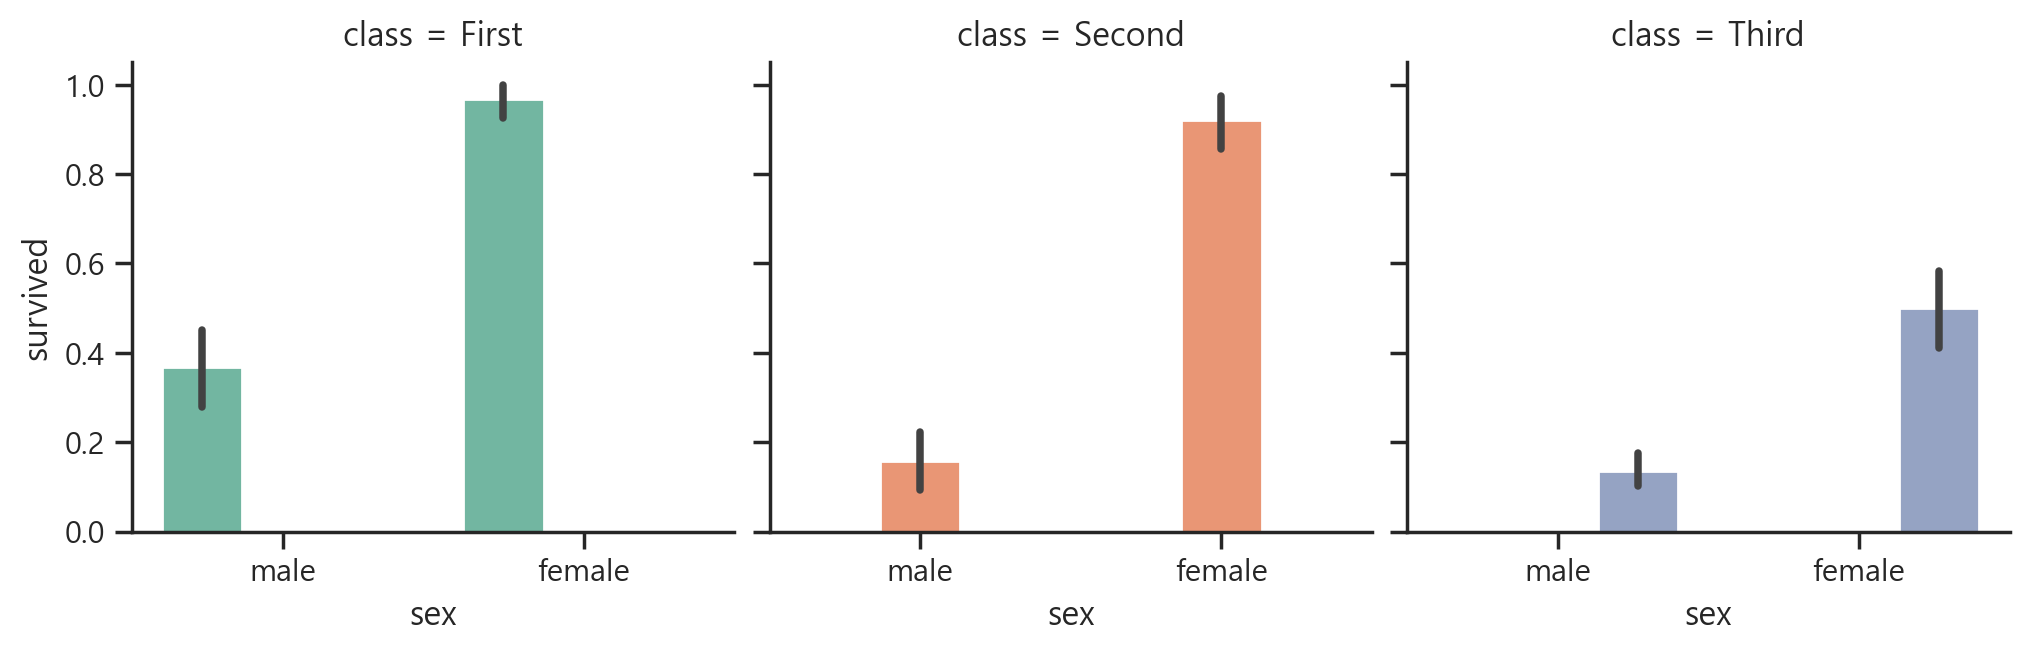

In [79]:
# class별 성별 생존률을 서브플롯
g = sns.catplot(data=titanic,
               x='sex',
               y='survived',
               hue='class',
               kind='bar', # 기본값은 strip
               col='class')
g.fig.set_size_inches(10,3)

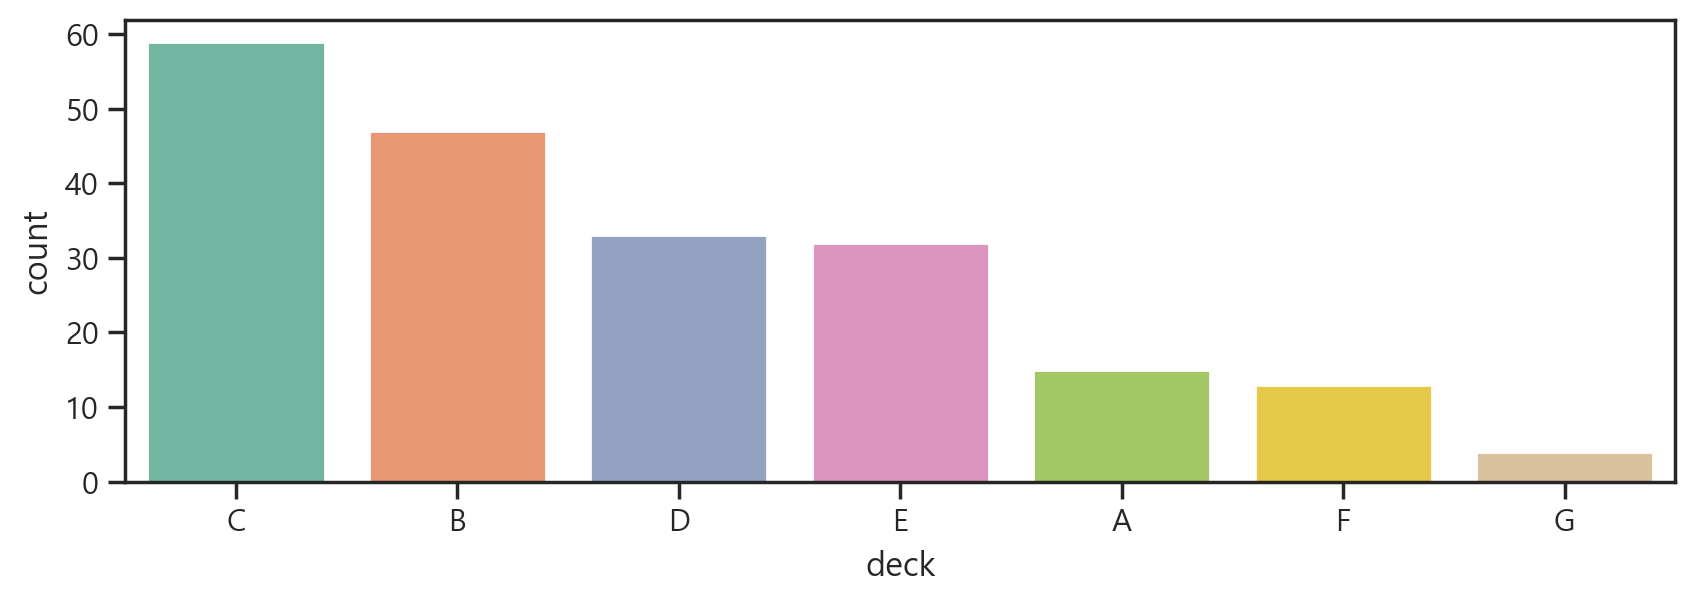

In [86]:
# deck별 데이터수를 막대그래프로(countplot)
sns.countplot(data=titanic, x='deck', order=titanic['deck'].value_counts().index)
plt.show()

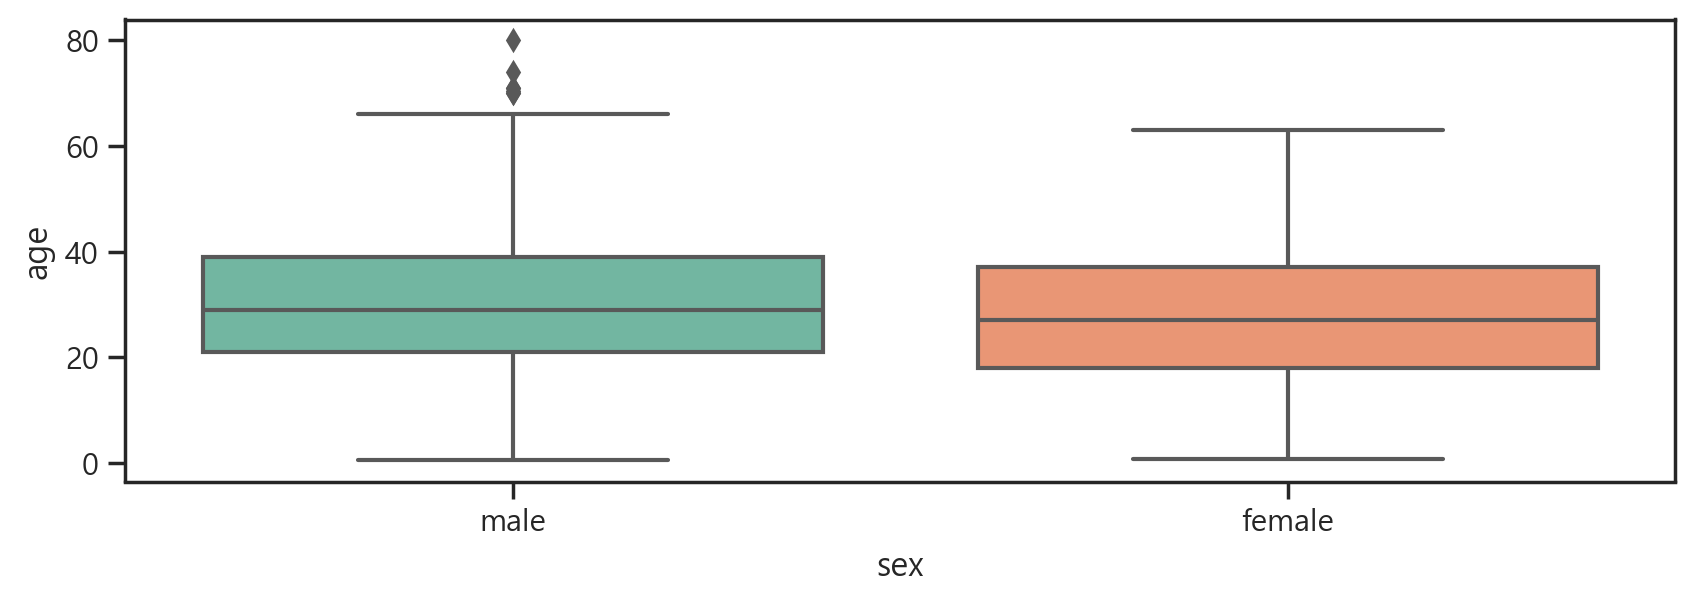

In [87]:
# boxplot
sns.boxplot(data=titanic, x='sex',y='age')
plt.show()

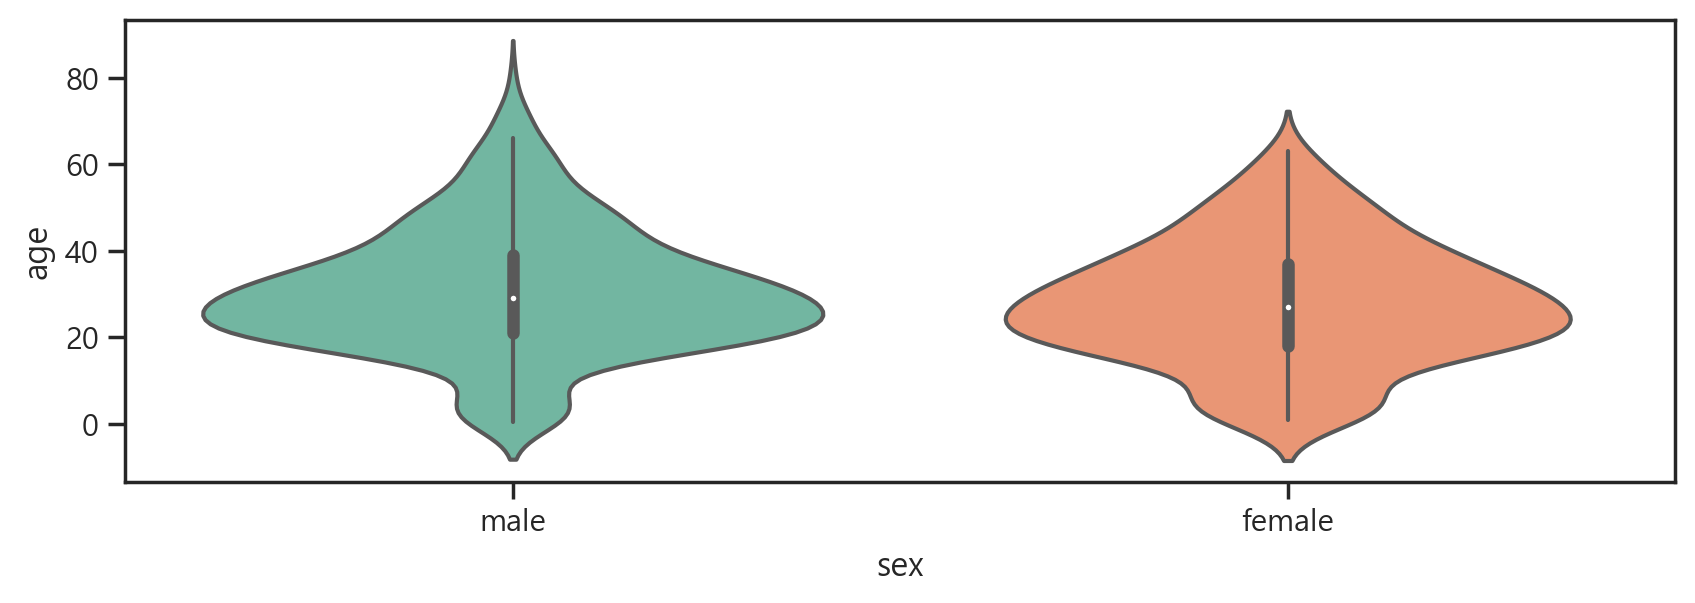

In [88]:
# violinplot
sns.violinplot(data=titanic, x='sex',y='age')
plt.show()

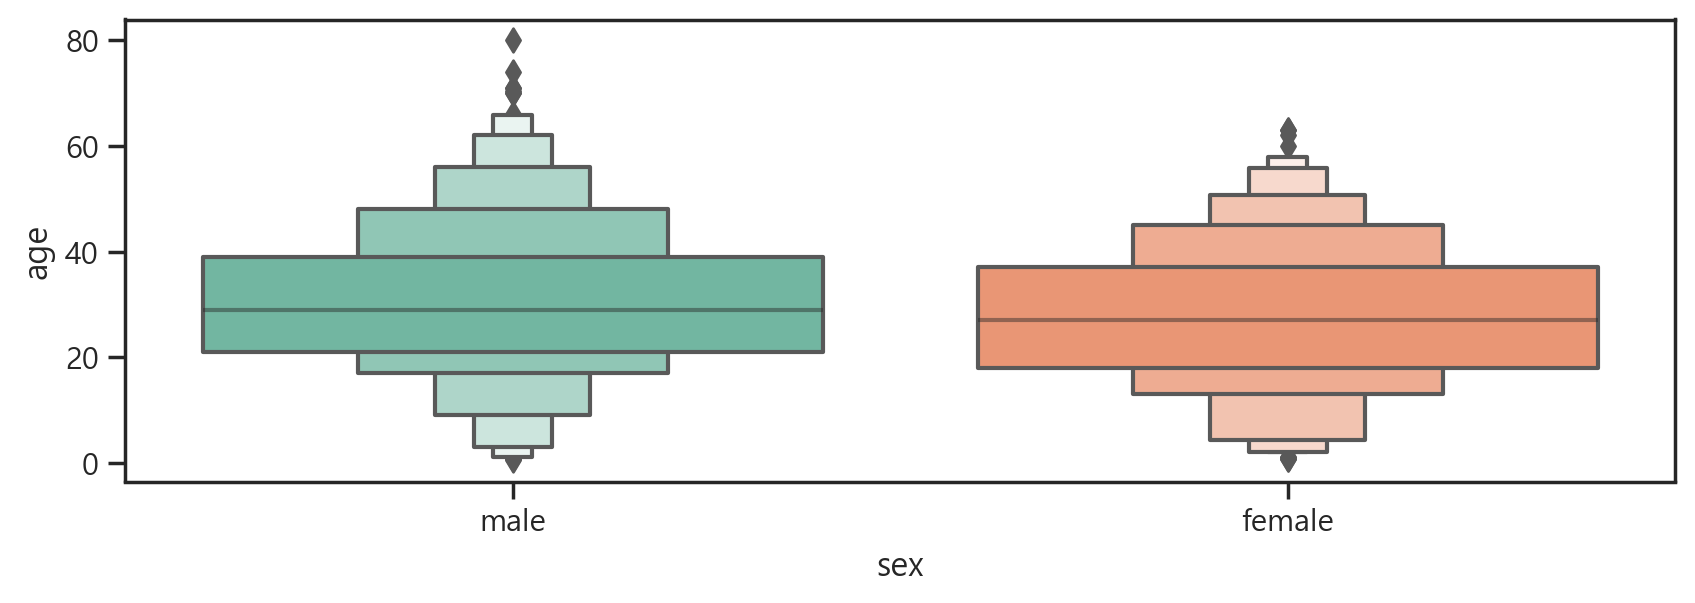

In [89]:
# boxenplot
sns.boxenplot(data=titanic, x='sex',y='age')
plt.show()

### 3) 쌍관계그래프 
- pairplot : 모든 수치형 변수 쌍에 대해 산점도와 히스토그램을 보여줌

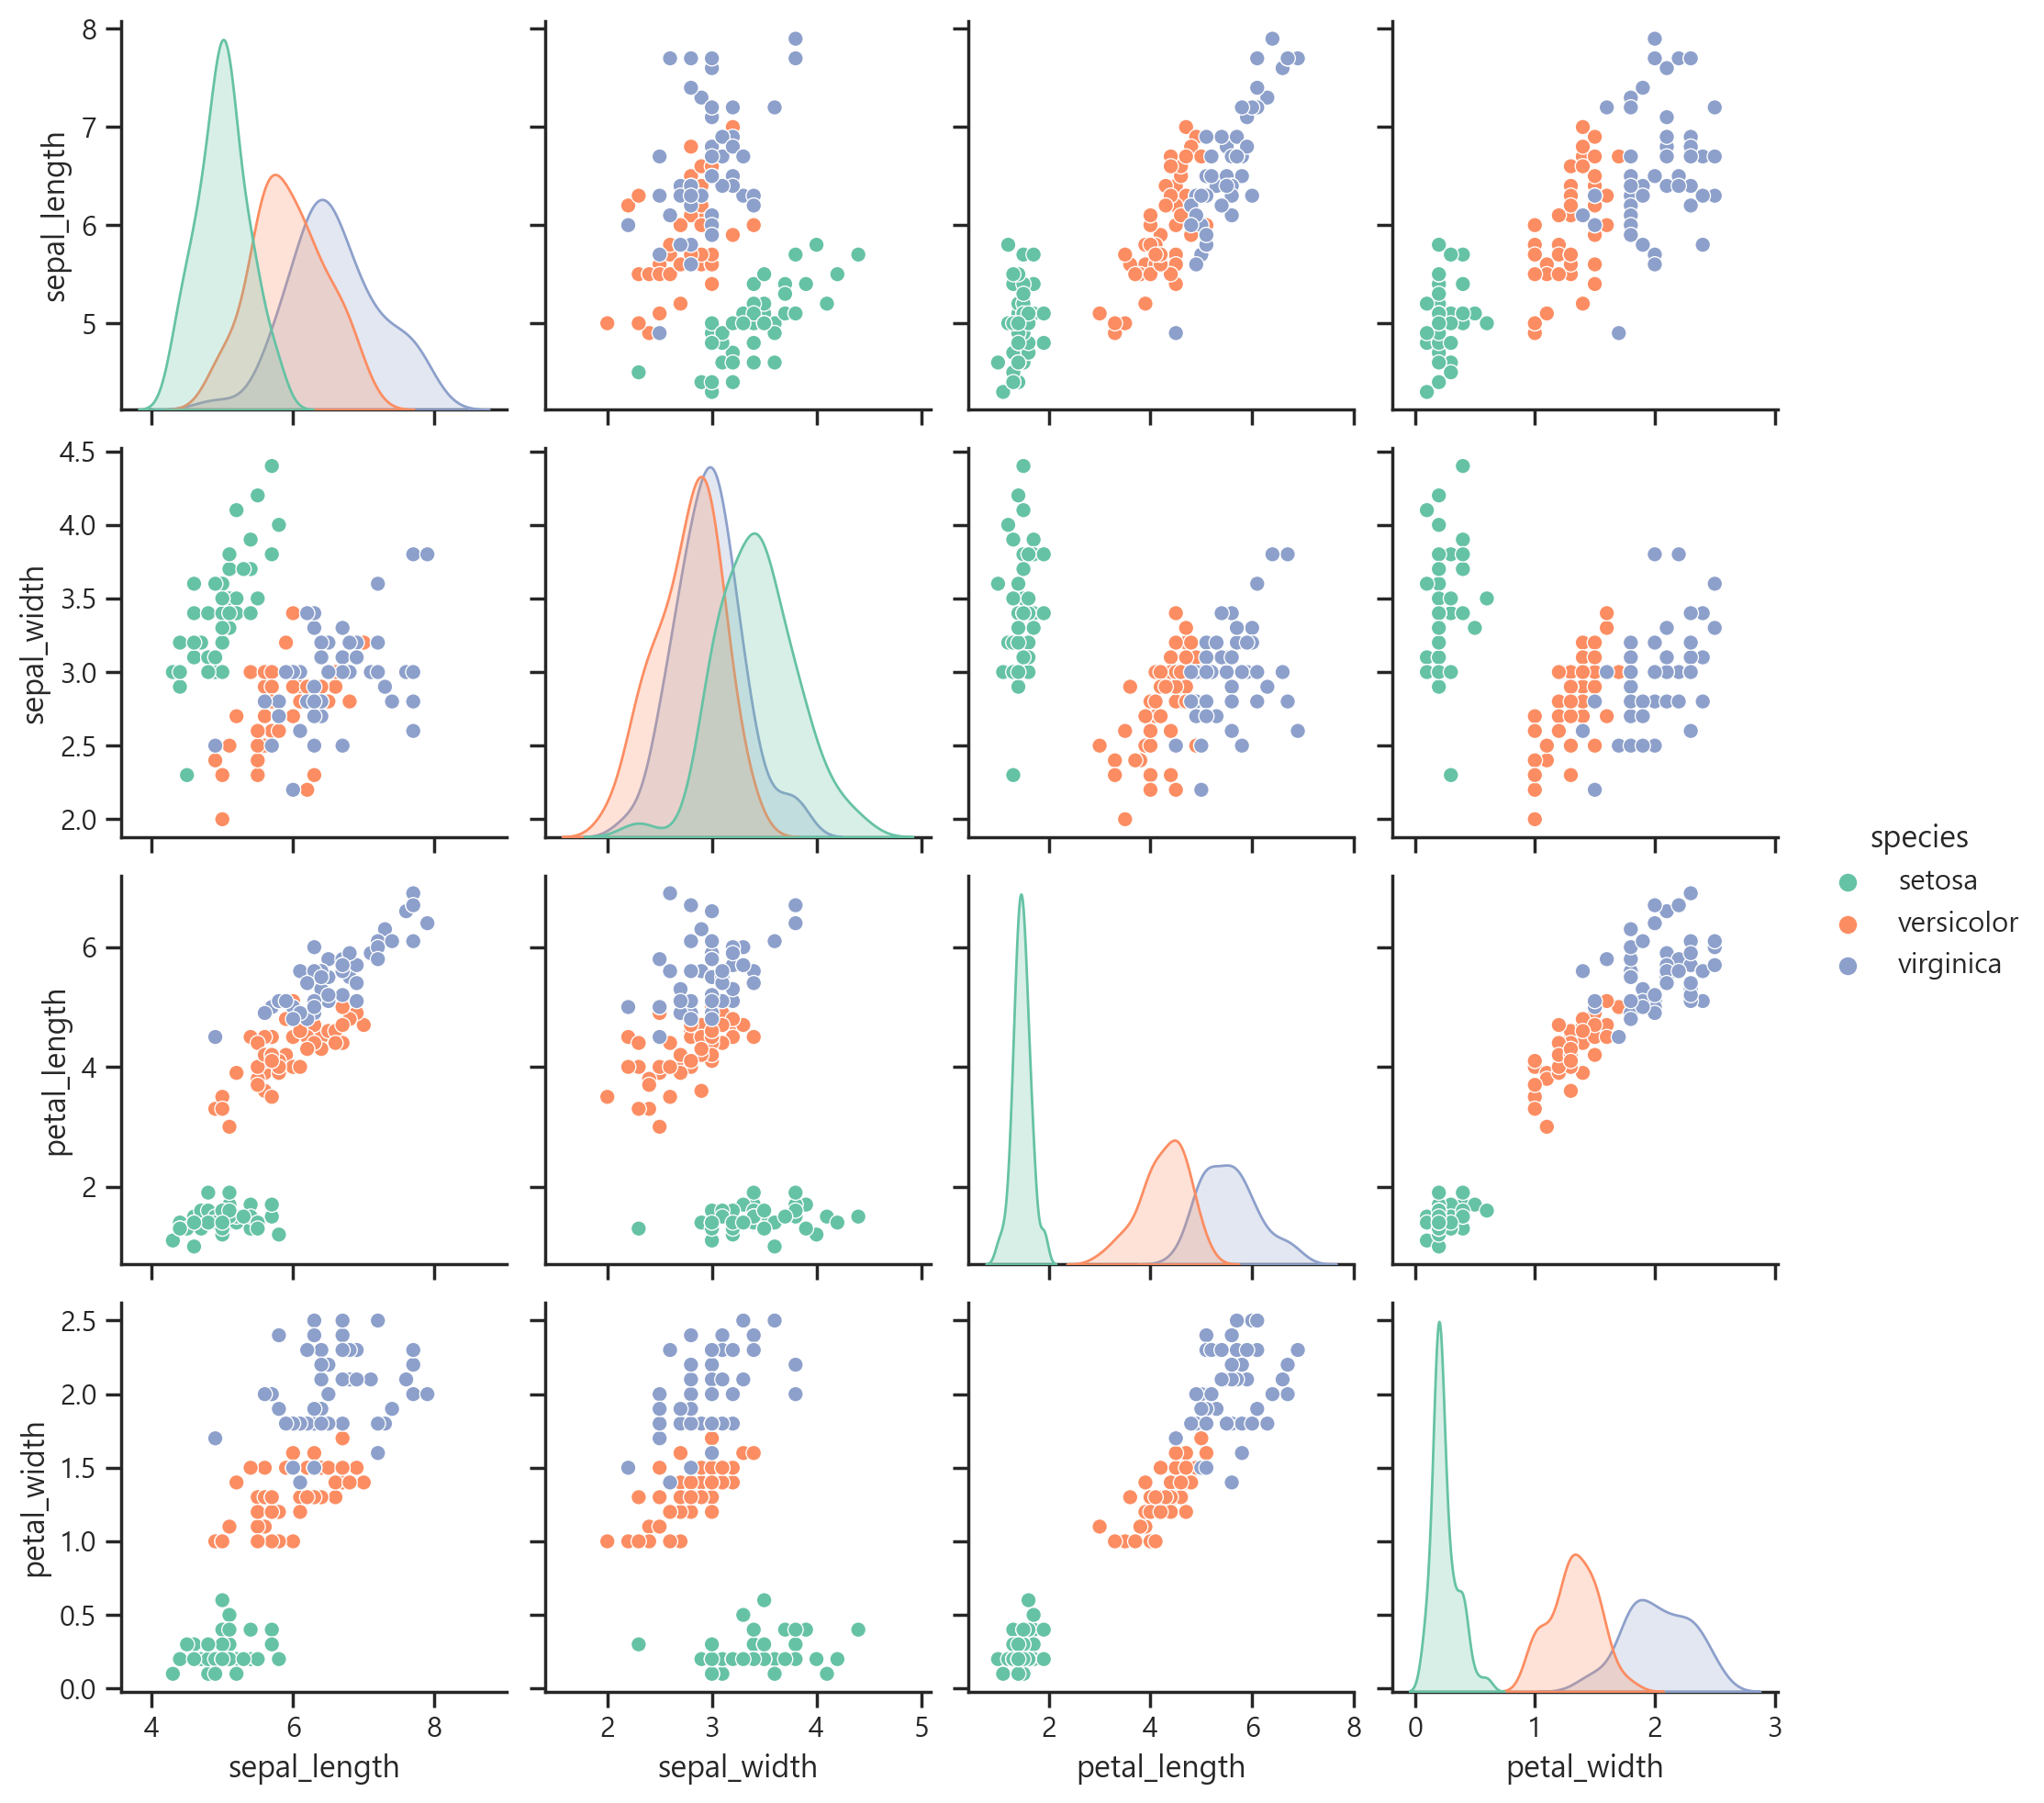

In [91]:
sns.pairplot(data=iris,hue='species')
plt.show()

### 4) 밀도그래프

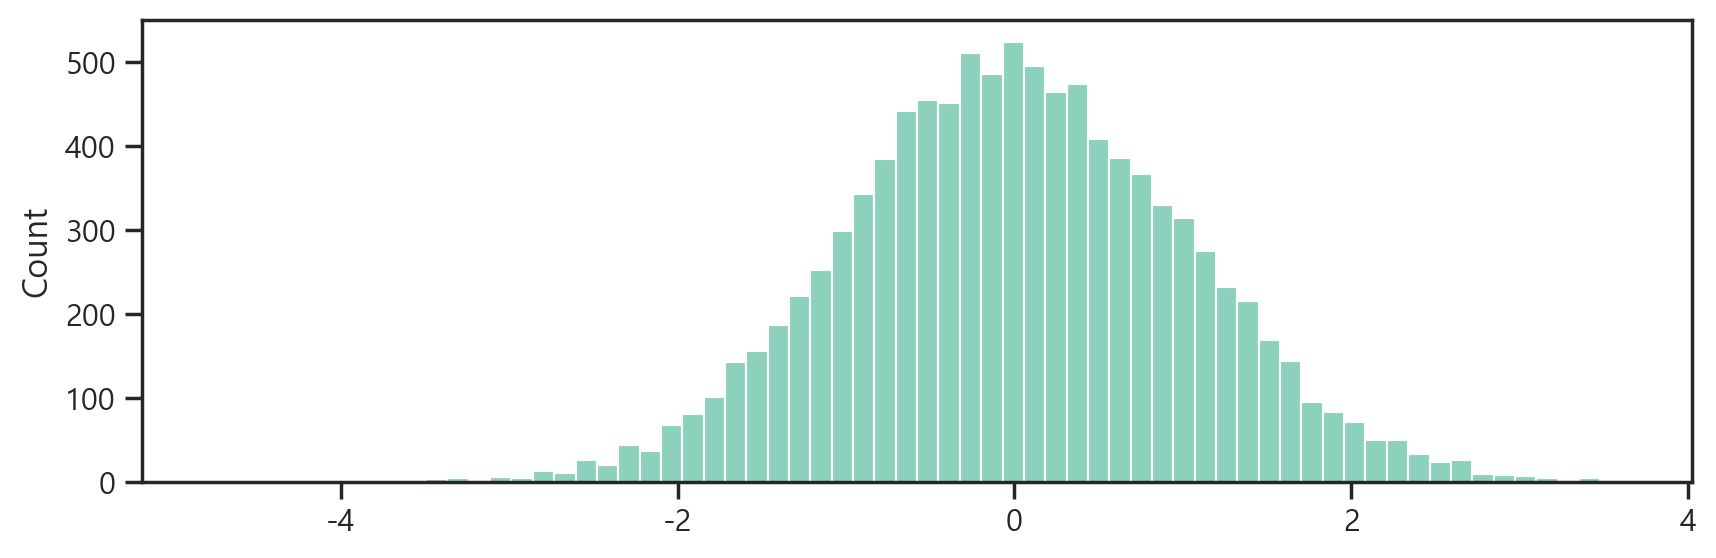

In [94]:
import numpy as np
x= np.random.randn(10000) # 평균0, 표준편차1인 정규분포를 이루는 10000개 데이터
sns.histplot(x, kde=False) # kde = False 분포를 매끄럽게
plt.show()

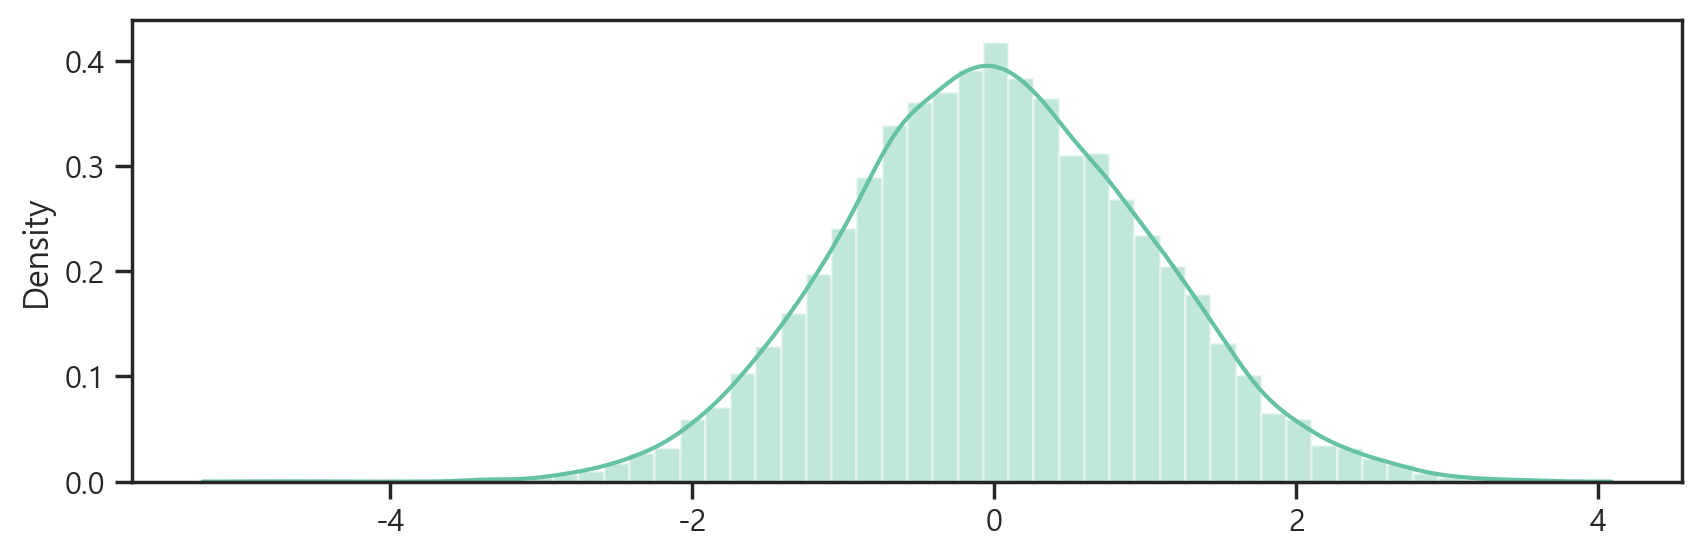

In [95]:
sns.distplot(x)
plt.show()

### 5) 회귀 그래프

In [96]:
corr=iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


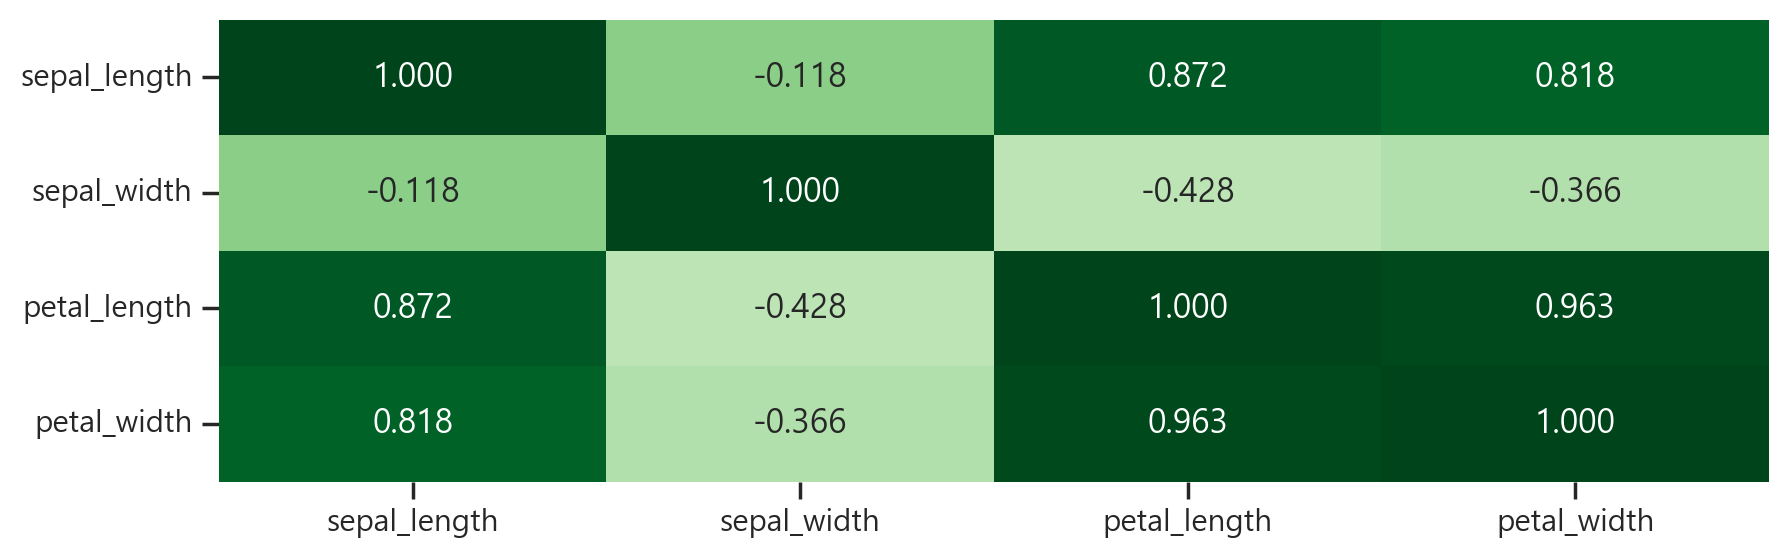

In [98]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens',cbar=False)
plt.show()

In [102]:
np.ones_like(corr, dtype = bool) # corr과 구조가 같은 1로 채워진 배열

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

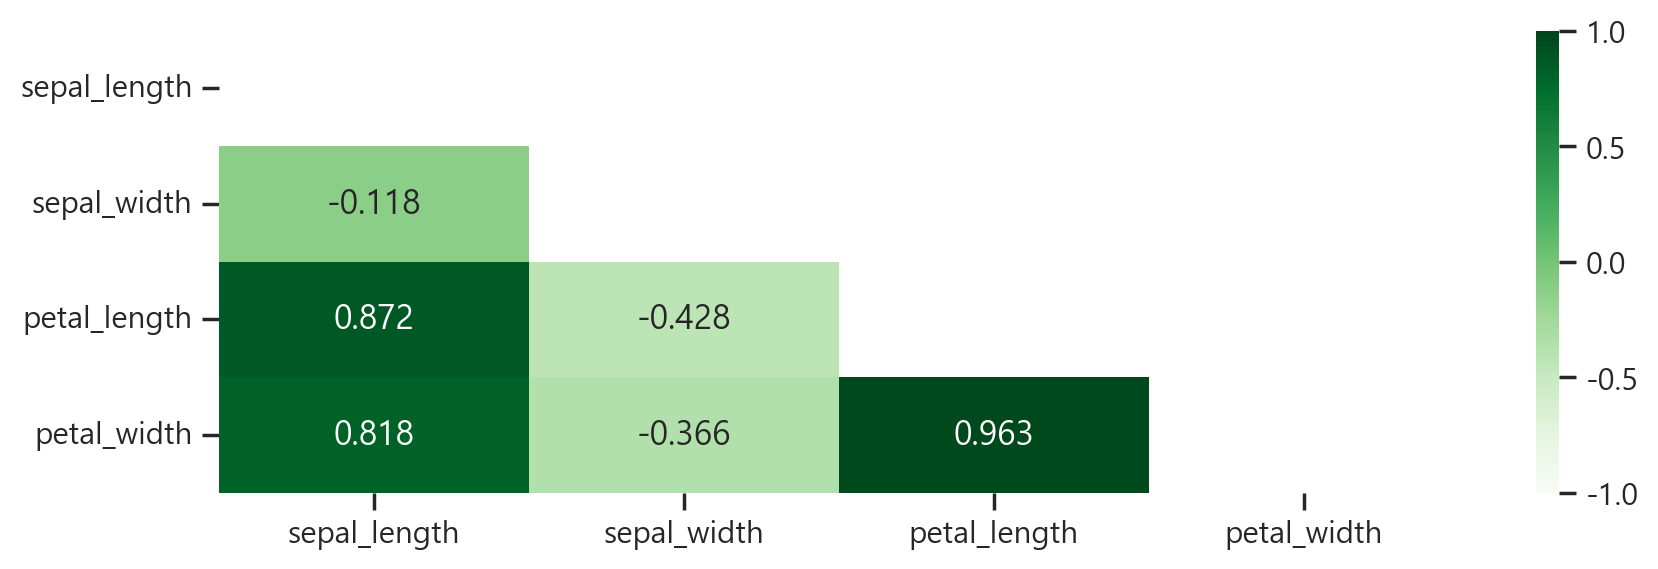

In [106]:
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens',mask=mask)
plt.show()

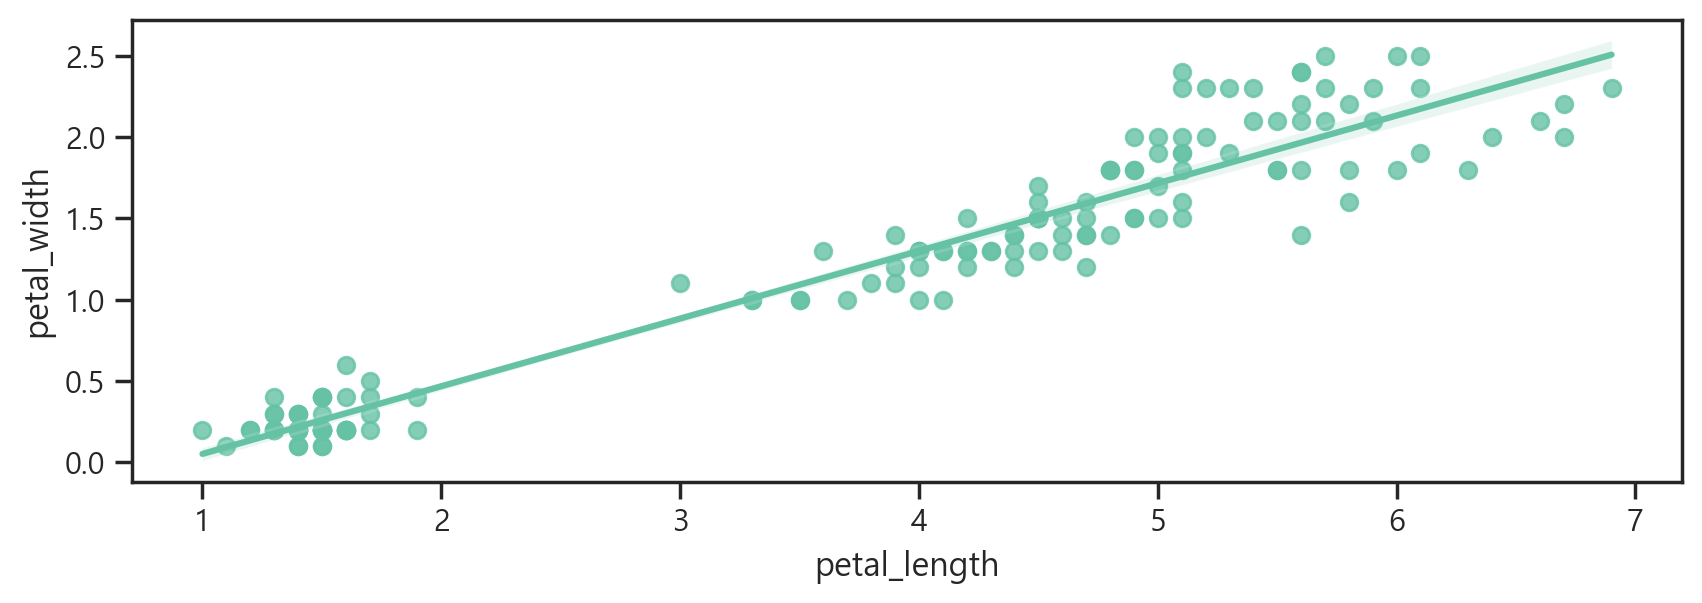

In [107]:
# 회귀그래프 : regplot(hue 사용불가), lmplot(hue사용가능)
sns.regplot(data=iris,x='petal_length', y='petal_width')
plt.show()

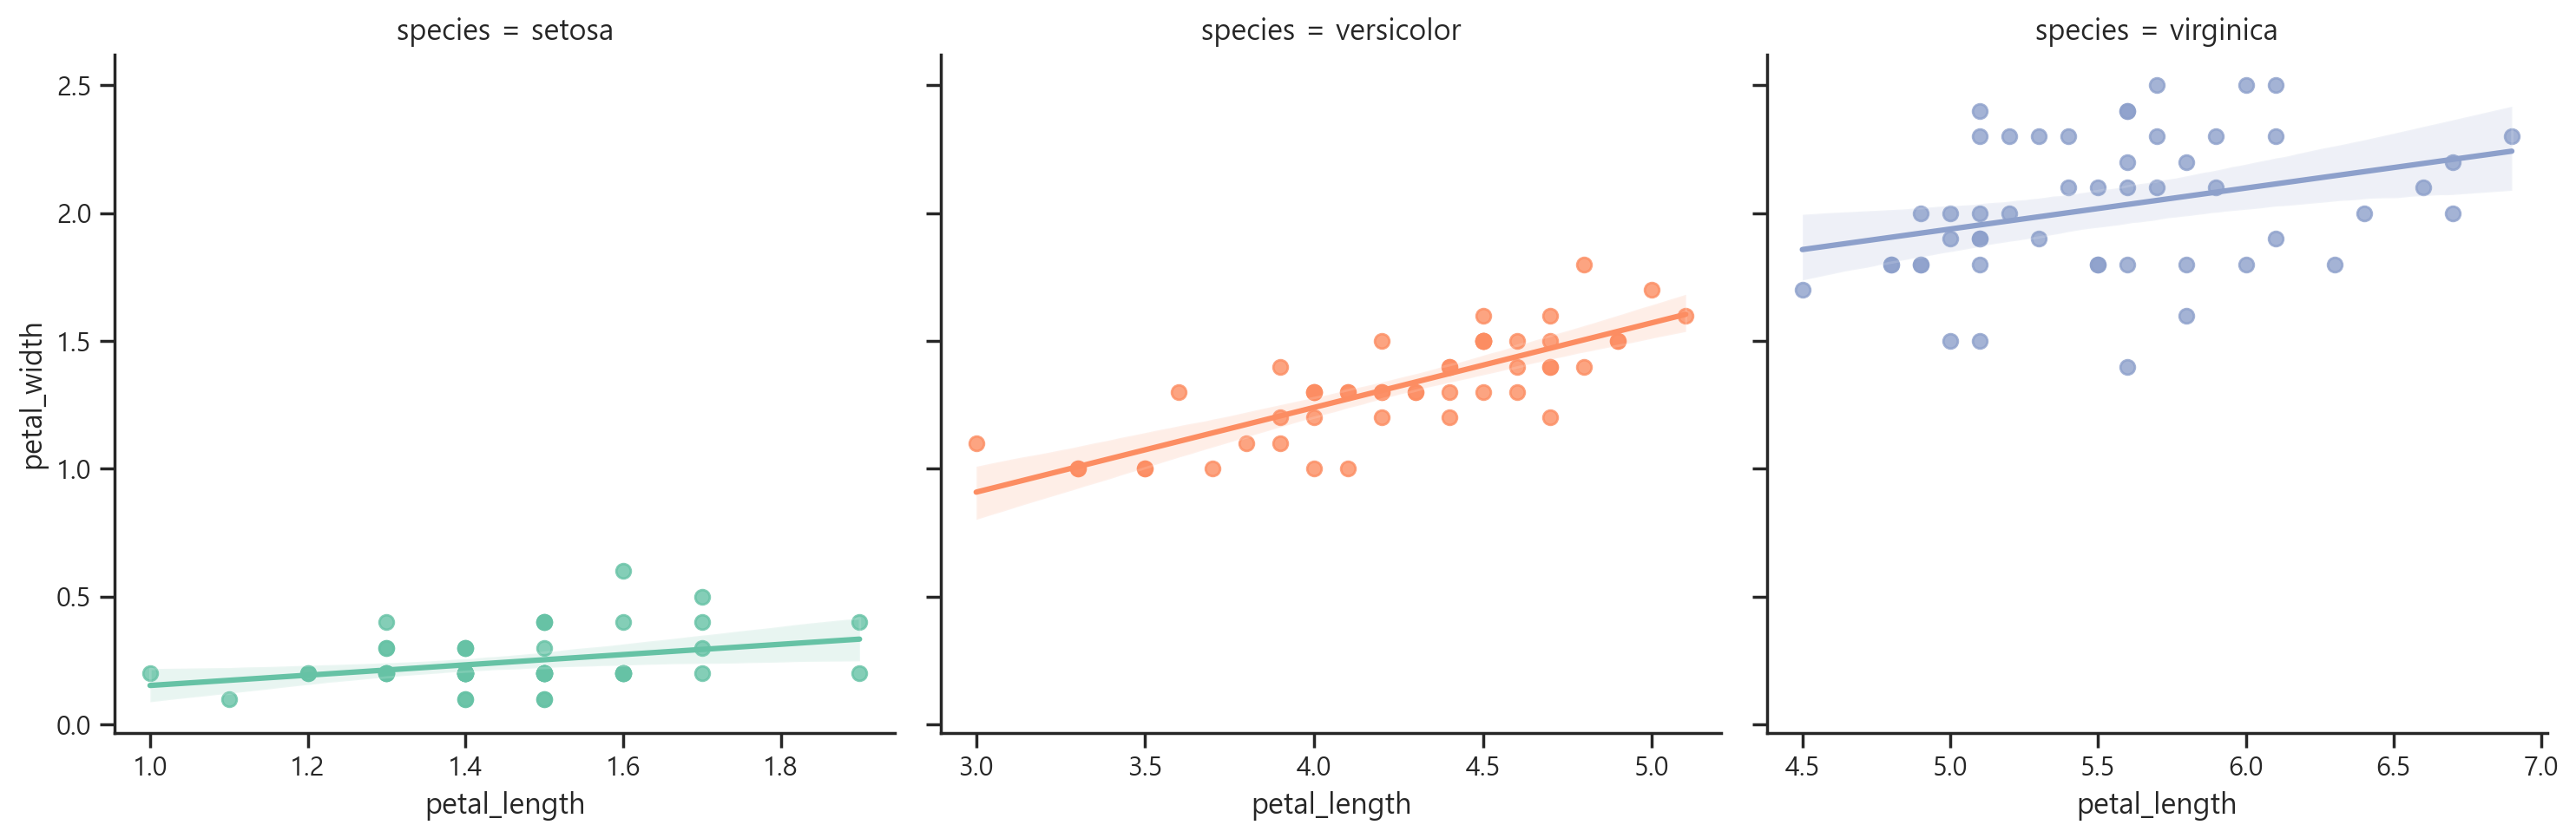

In [112]:
sns.lmplot(data=iris,x='petal_length', y='petal_width', hue='species',
          col='species',
          sharex=False)
plt.show()

## 2.4 다중 그래프를 위한 FacetGrid
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional--smallsmall--multiplesmultiples 교안 73page

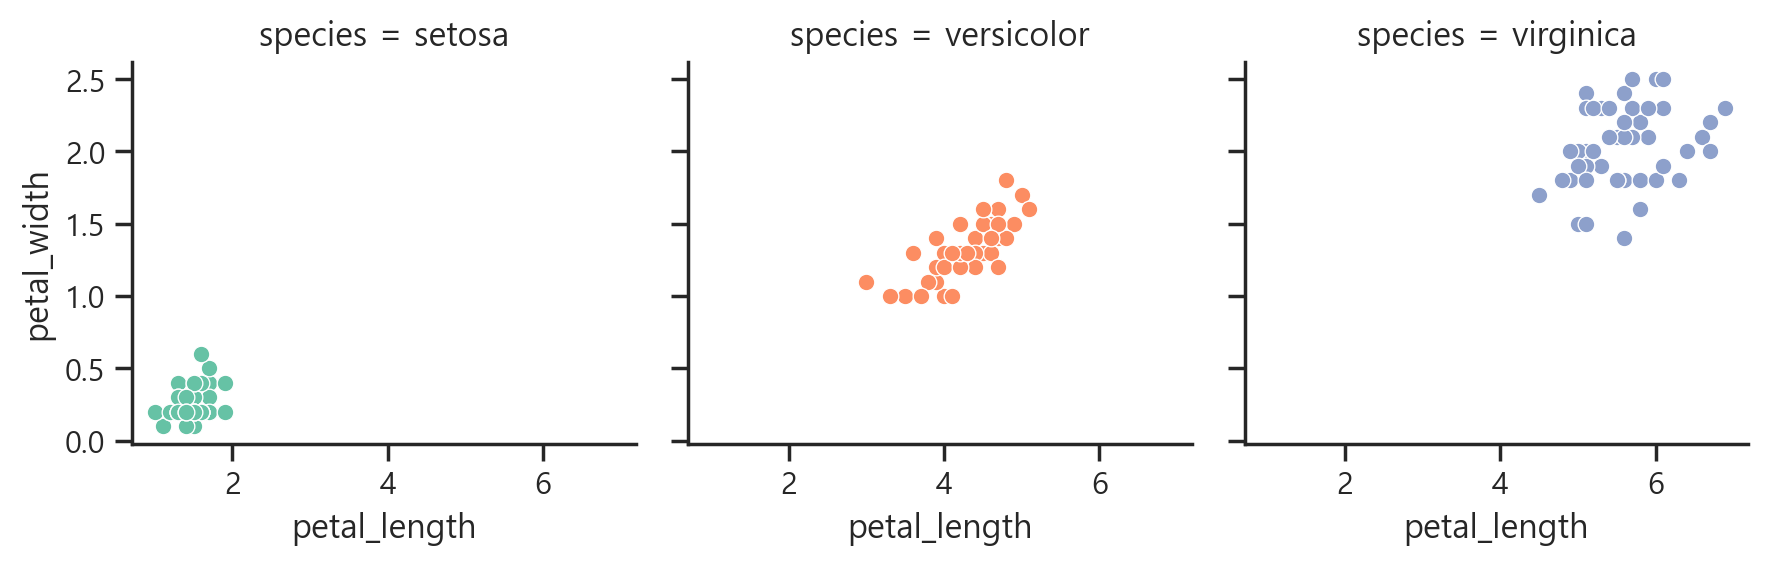

In [116]:
g=sns.FacetGrid(iris,col='species', hue='species')
g.map(sns.scatterplot,'petal_length','petal_width')
plt.show()

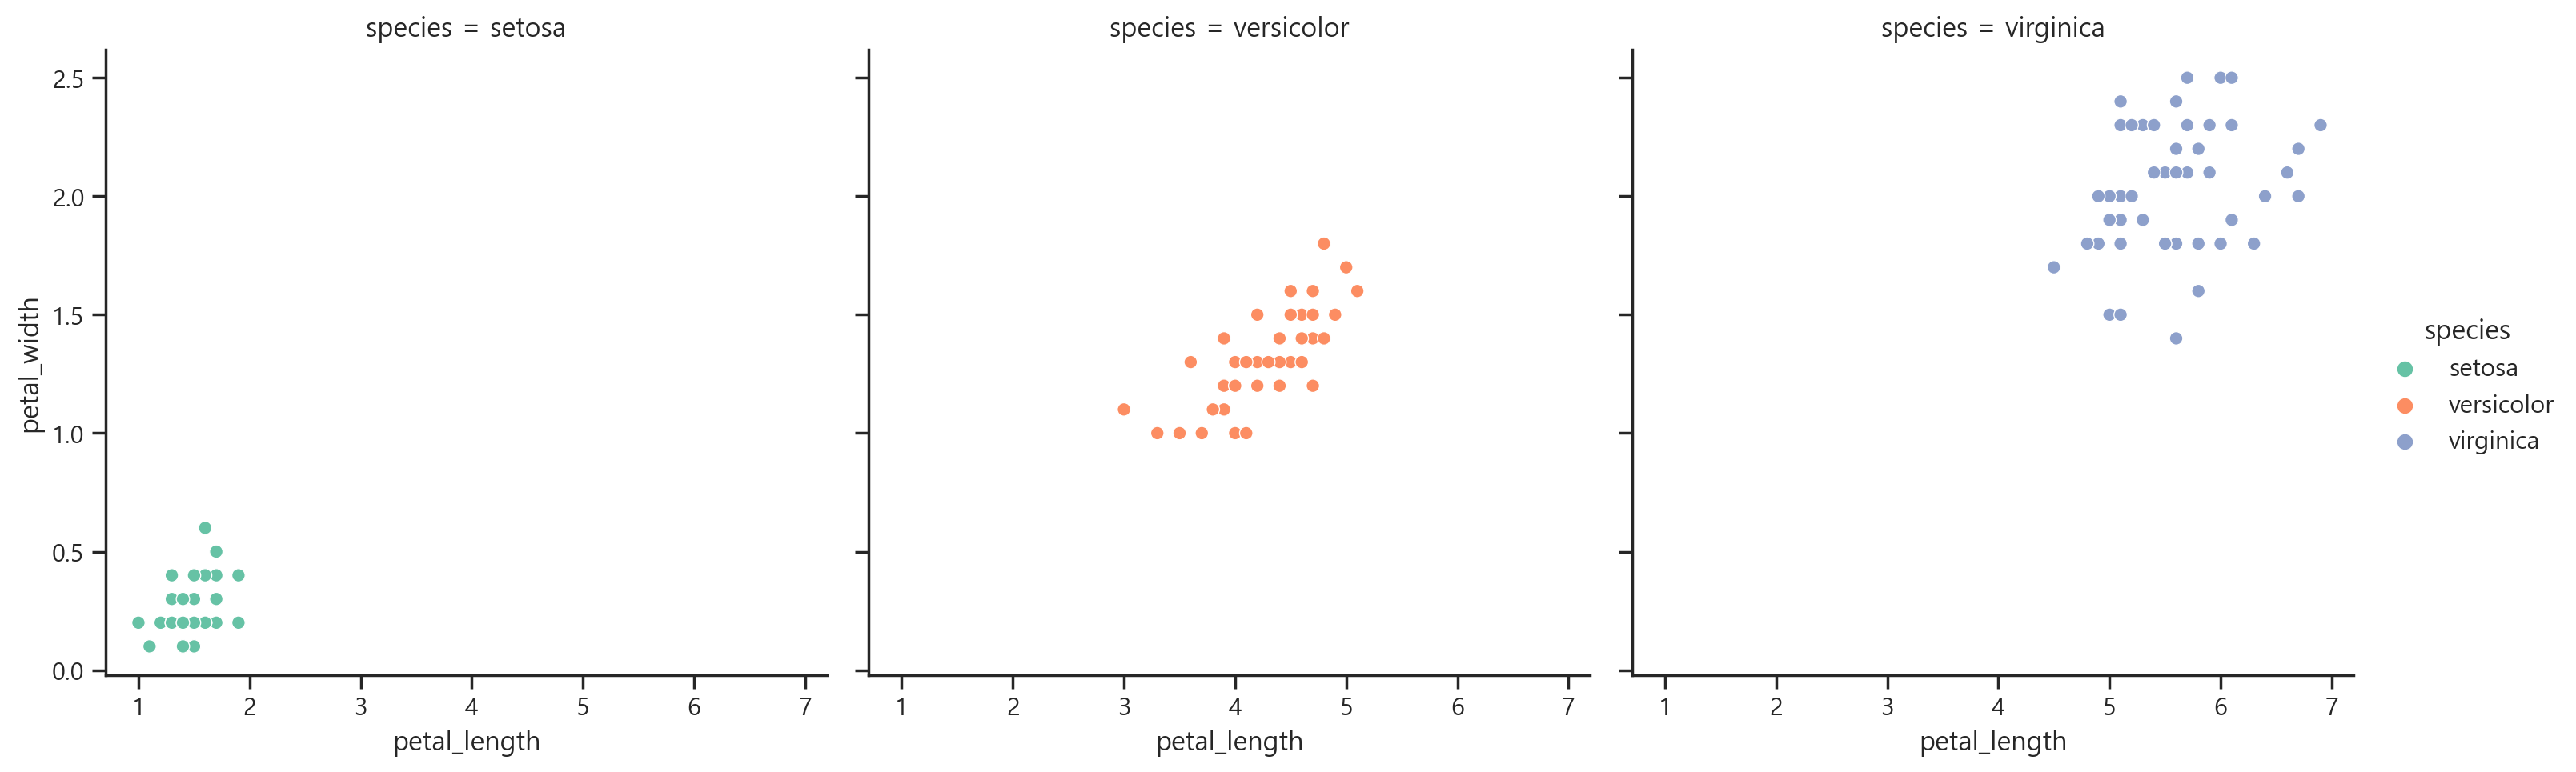

In [117]:
sns.relplot(iris, x='petal_length',y='petal_width', hue='species', col='species')
g.fig.set_size_inches(10,3)
plt.show()